# Objective :
	The objective of this project is to predict whether an article will be popular or not,  prior to its publication by estimating the number of shares, using machine learning algorithms. The motivation behind tackling this problem is that before investing resources and time into the publication of a new article, we can predict whether or not it is worthy of being published in the first place.

# Data Collection : 
The data was collected from the UCI Machine Learning repository. It contains the content of all the articles published during a two year period, from 2013 to 2015on Mashable (mashable.com).
(https://archive.ics.uci.edu/ml/datasets/Online+News+Popularity) 
The dataset consists of 39644 records and 61 attributes.


# Data Features:

Attribute Information:
     0. url:                           URL of the article
     1. timedelta:                     Days between the article publication and
                                       the dataset acquisition
     2. n_tokens_title:                Number of words in the title
     3. n_tokens_content:              Number of words in the content
     4. n_unique_tokens:               Rate of unique words in the content
     5. n_non_stop_words:              Rate of non-stop words in the content
     6. n_non_stop_unique_tokens:      Rate of unique non-stop words in the
                                       content
     7. num_hrefs:                     Number of links
     8. num_self_hrefs:                Number of links to other articles
                                       published by Mashable
     9. num_imgs:                      Number of images
    10. num_videos:                    Number of videos
    11. average_token_length:          Average length of the words in the
                                       content
    12. num_keywords:                  Number of keywords in the metadata
    13. data_channel_is_lifestyle:     Is data channel 'Lifestyle'?
    14. data_channel_is_entertainment: Is data channel 'Entertainment'?
    15. data_channel_is_bus:           Is data channel 'Business'?
    16. data_channel_is_socmed:        Is data channel 'Social Media'?
    17. data_channel_is_tech:          Is data channel 'Tech'?
    18. data_channel_is_world:         Is data channel 'World'?
    19. kw_min_min:                    Worst keyword (min. shares)
    20. kw_max_min:                    Worst keyword (max. shares)
    21. kw_avg_min:                    Worst keyword (avg. shares)
    22. kw_min_max:                    Best keyword (min. shares)
    23. kw_max_max:                    Best keyword (max. shares)
    24. kw_avg_max:                    Best keyword (avg. shares)
    25. kw_min_avg:                    Avg. keyword (min. shares)
    26. kw_max_avg:                    Avg. keyword (max. shares)
    27. kw_avg_avg:                    Avg. keyword (avg. shares)
    28. self_reference_min_shares:     Min. shares of referenced articles in
                                       Mashable
    29. self_reference_max_shares:     Max. shares of referenced articles in
                                       Mashable
    30. self_reference_avg_sharess:    Avg. shares of referenced articles in
                                       Mashable
    31. weekday_is_monday:             Was the article published on a Monday?
    32. weekday_is_tuesday:            Was the article published on a Tuesday?
    33. weekday_is_wednesday:          Was the article published on a Wednesday?
    34. weekday_is_thursday:           Was the article published on a Thursday?
    35. weekday_is_friday:             Was the article published on a Friday?
    36. weekday_is_saturday:           Was the article published on a Saturday?
    37. weekday_is_sunday:             Was the article published on a Sunday?
    38. is_weekend:                    Was the article published on the weekend?
    39. LDA_00:                        Closeness to LDA topic 0
    40. LDA_01:                        Closeness to LDA topic 1
    41. LDA_02:                        Closeness to LDA topic 2
    42. LDA_03:                        Closeness to LDA topic 3
    43. LDA_04:                        Closeness to LDA topic 4
    44. global_subjectivity:           Text subjectivity
    45. global_sentiment_polarity:     Text sentiment polarity
    46. global_rate_positive_words:    Rate of positive words in the content
    47. global_rate_negative_words:    Rate of negative words in the content
    48. rate_positive_words:           Rate of positive words among non-neutral
                                       tokens
    49. rate_negative_words:           Rate of negative words among non-neutral
                                       tokens
    50. avg_positive_polarity:         Avg. polarity of positive words
    51. min_positive_polarity:         Min. polarity of positive words
    52. max_positive_polarity:         Max. polarity of positive words
    53. avg_negative_polarity:         Avg. polarity of negative  words
    54. min_negative_polarity:         Min. polarity of negative  words
    55. max_negative_polarity:         Max. polarity of negative  words
    56. title_subjectivity:            Title subjectivity
    57. title_sentiment_polarity:      Title polarity
    58. abs_title_subjectivity:        Absolute subjectivity level
    59. abs_title_sentiment_polarity:  Absolute polarity level
    60. shares:                        Number of shares (target)


# Importing Required Libraries

In [0]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import seaborn as sns


from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectFromModel
from sklearn.metrics import accuracy_score

from sklearn.metrics import confusion_matrix,classification_report
from sklearn.metrics import accuracy_score,mean_squared_error
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import LinearSVC, SVC
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve, auc, log_loss
from sklearn.ensemble import GradientBoostingClassifier

In [0]:
from google.colab import files
uploaded = files.upload()

Saving OnlineNewsPopularity.csv to OnlineNewsPopularity (2).csv


In [0]:
import io
data = pd.read_csv(io.BytesIO(uploaded['OnlineNewsPopularity.csv']))

In [0]:
#data = pd.read_csv(r"C:\Users\lakshya_hanshvik\Desktop\Datasets/OnlineNewsPopularity.csv")
data.head(5)

,url,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,average_token_length,num_keywords,data_channel_is_lifestyle,data_channel_is_entertainment,data_channel_is_bus,data_channel_is_socmed,data_channel_is_tech,data_channel_is_world,kw_min_min,kw_max_min,kw_avg_min,kw_min_max,kw_max_max,kw_avg_max,kw_min_avg,kw_max_avg,kw_avg_avg,self_reference_min_shares,self_reference_max_shares,self_reference_avg_sharess,weekday_is_monday,weekday_is_tuesday,weekday_is_wednesday,weekday_is_thursday,weekday_is_friday,weekday_is_saturday,weekday_is_sunday,is_weekend,LDA_00,LDA_01,LDA_02,LDA_03,LDA_04,global_subjectivity,global_sentiment_polarity,global_rate_positive_words,global_rate_negative_words,rate_positive_words,rate_negative_words,avg_positive_polarity,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
0,http://mashable.com/2013/01/07/amazon-instant-...,731.0,12.0,219.0,0.663594,1.0,0.815385,4.0,2.0,1.0,0.0,4.680365,5.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,496.0,496.0,496.000000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.500331,0.378279,0.040005,0.041263,0.040123,0.521617,0.092562,0.045662,0.013699,0.769231,0.230769,0.378636,0.100000,0.7,-0.350000,-0.600,-0.200000,0.500000,-0.187500,0.000000,0.187500,593
1,http://mashable.com/2013/01/07/ap-samsung-spon...,731.0,9.0,255.0,0.604743,1.0,0.791946,3.0,1.0,1.0,0.0,4.913725,4.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.799756,0.050047,0.050096,0.050101,0.050001,0.341246,0.148948,0.043137,0.015686,0.733333,0.266667,0.286915,0.033333,0.7,-0.118750,-0.125,-0.100000,0.000000,0.000000,0.500000,0.000000,711
2,http://mashable.com/2013/01/07/apple-40-billio...,731.0,9.0,211.0,0.575130,1.0,0.663866,3.0,1.0,1.0,0.0,4.393365,6.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,918.0,918.0,918.000000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.217792,0.033334,0.033351,0.033334,0.682188,0.702222,0.323333,0.056872,0.009479,0.857143,0.142857,0.495833,0.100000,1.0,-0.466667,-0.800,-0.133333,0.000000,0.000000,0.500000,0.000000,1500
3,http://mashable.com/2013/01/07/astronaut-notre...,731.0,9.0,531.0,0.503788,1.0,0.665635,9.0,0.0,1.0,0.0,4.404896,7.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.028573,0.419300,0.494651,0.028905,0.028572,0.429850,0.100705,0.041431,0.020716,0.666667,0.333333,0.385965,0.136364,0.8,-0.369697,-0.600,-0.166667,0.000000,0.000000,0.500000,0.000000,1200
4,http://mashable.com/2013/01/07/att-u-verse-apps/,731.0,13.0,1072.0,0.415646,1.0,0.540890,19.0,19.0,20.0,0.0,4.682836,7.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,545.0,16000.0,3151.157895,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.028633,0.028794,0.028575,0.028572,0.885427,0.513502,0.281003,0.074627,0.012127,0.860215,0.139785,0.411127,0.033333,1.0,-0.220192,-0.500,-0.050000,0.454545,0.136364,0.045455,0.136364,505


#Data Information:
As we can see below, no null records exist in the dataset

In [0]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39644 entries, 0 to 39643
Data columns (total 61 columns):
url                               39644 non-null object
timedelta                         39644 non-null float64
n_tokens_title                    39644 non-null float64
n_tokens_content                  39644 non-null float64
n_unique_tokens                   39644 non-null float64
n_non_stop_words                  39644 non-null float64
n_non_stop_unique_tokens          39644 non-null float64
num_hrefs                         39644 non-null float64
num_self_hrefs                    39644 non-null float64
num_imgs                          39644 non-null float64
num_videos                        39644 non-null float64
average_token_length              39644 non-null float64
num_keywords                      39644 non-null float64
data_channel_is_lifestyle         39644 non-null float64
 data_channel_is_entertainment    39644 non-null float64
data_channel_is_bus               396

# EDA

Data cleaning :                   
Checking for Missing Values The UCI machine learning repository which hosts the current data set has indicated that the data set has no missing values

#As we can see below, no null records exist in the dataset

In [0]:
data.isnull().sum().sum()

0

In [0]:
data= data.drop(['url'],axis=1)

In [0]:
# Statistical summary

In [0]:
data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
timedelta,39644.0,354.530471,214.163767,8.00000,164.000000,339.000000,542.000000,731.000000
n_tokens_title,39644.0,10.398749,2.114037,2.00000,9.000000,10.000000,12.000000,23.000000
n_tokens_content,39644.0,546.514731,471.107508,0.00000,246.000000,409.000000,716.000000,8474.000000
n_unique_tokens,39644.0,0.548216,3.520708,0.00000,0.470870,0.539226,0.608696,701.000000
n_non_stop_words,39644.0,0.996469,5.231231,0.00000,1.000000,1.000000,1.000000,1042.000000
n_non_stop_unique_tokens,39644.0,0.689175,3.264816,0.00000,0.625739,0.690476,0.754630,650.000000
num_hrefs,39644.0,10.883690,11.332017,0.00000,4.000000,8.000000,14.000000,304.000000
num_self_hrefs,39644.0,3.293638,3.855141,0.00000,1.000000,3.000000,4.000000,116.000000
num_imgs,39644.0,4.544143,8.309434,0.00000,1.000000,1.000000,4.000000,128.000000
num_videos,39644.0,1.249874,4.107855,0.00000,0.000000,0.000000,1.000000,91.000000


# Target Variable

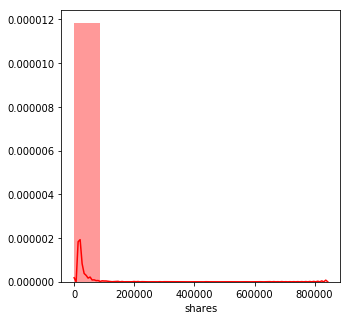

In [0]:
plt.figure(figsize=(5,5))
sns.distplot(data['shares'], color='r', bins=10)

# Target variable after log transformation


count    39644.000000
mean         7.474855
std          0.930486
min          0.000000
25%          6.852243
50%          7.244228
75%          7.937375
max         13.645078
Name: shares, dtype: float64

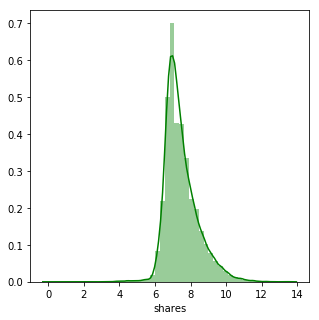

In [0]:
target = np.log(data.shares)

plt.figure(figsize=(5,5))
sns.distplot(target, color='g', bins=50)

target.describe()

# Data in Histogram
Plotting the histogram to find missing values which are represented as zero.

While checking the dataset for 0 values, I found 0 values in rate_positive_words, rate_negative words, and averagetoken_length variables

The Histograms also show that there are many categorical variables.

['data_channel_is_lifestyle',' data_channel_is_entertainment ', 'data_channel_is_bus','data_channel_is_socmed', 'data_channel_is_tech','data_channel_is_world','kw_max_max',' weekday_is_monday', ' weekday_is_tuesday', ' weekday_is_wednesday',' weekday_is_thursday', ' weekday_is_friday', ' weekday_is_saturday', ' weekday_is_sunday', 'is_weekend']

/usr/local/lib/python3.6/dist-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


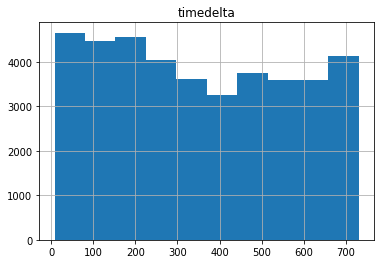

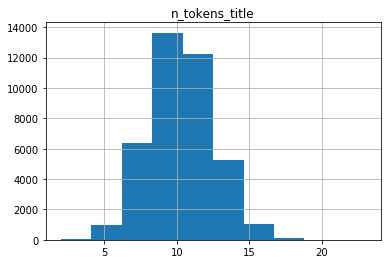

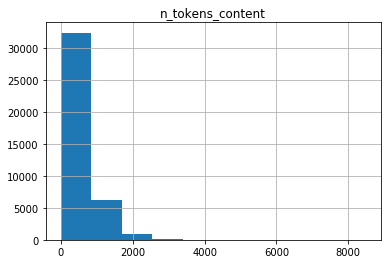

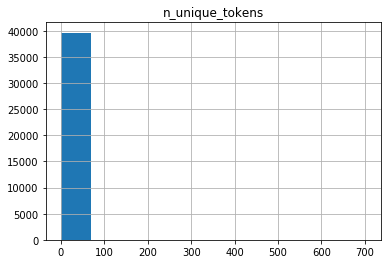

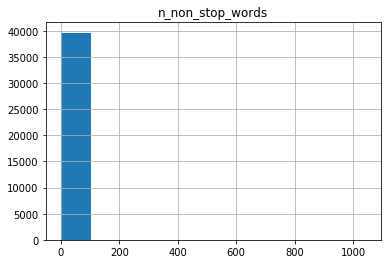

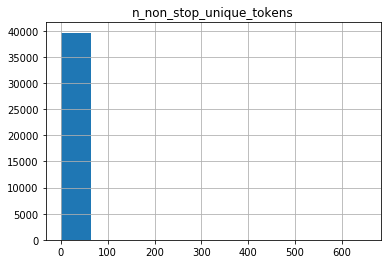

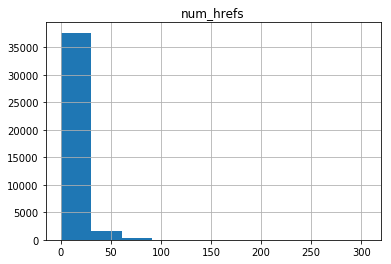

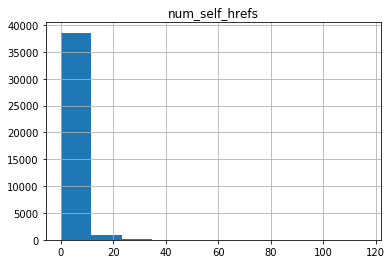

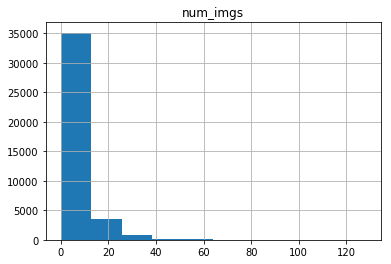

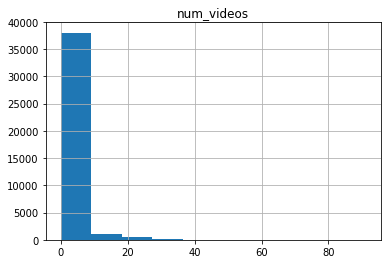

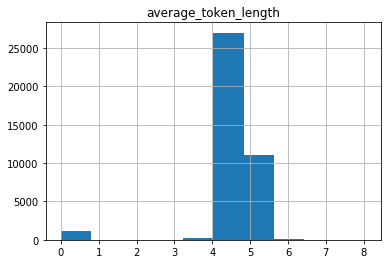

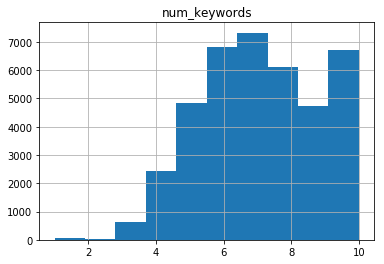

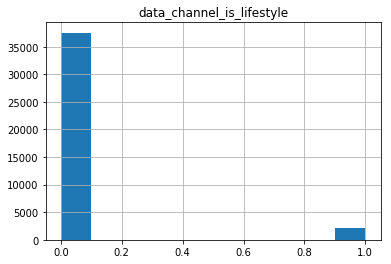

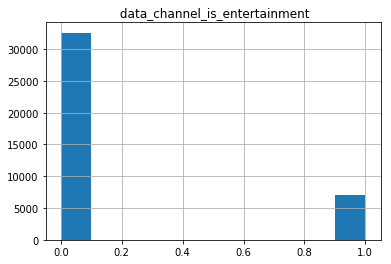

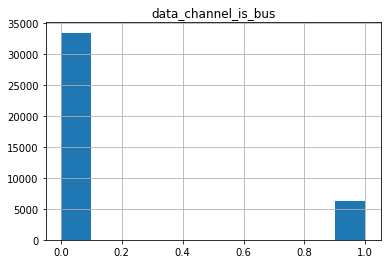

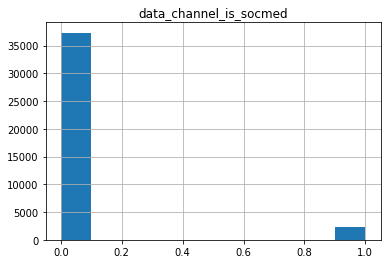

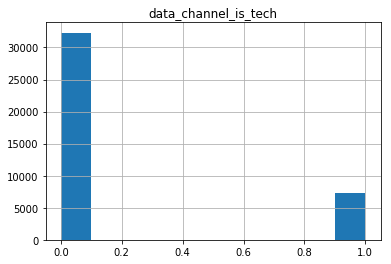

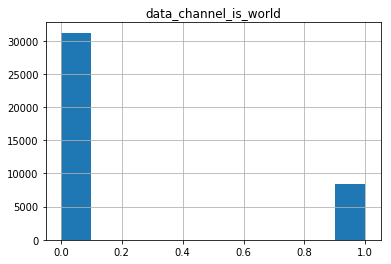

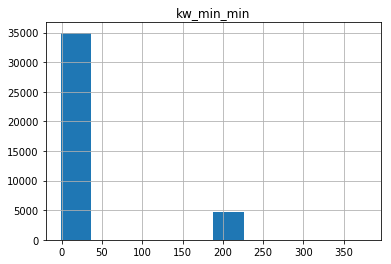

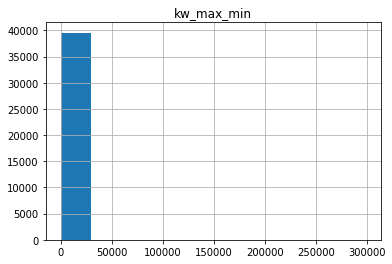

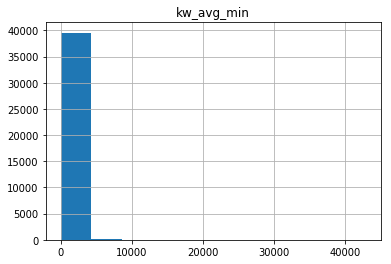

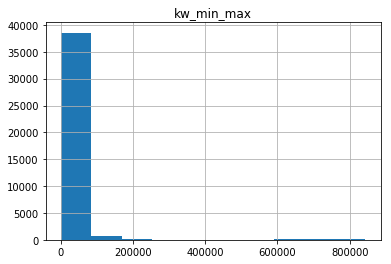

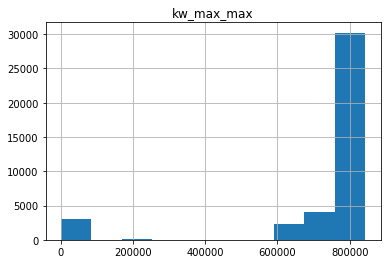

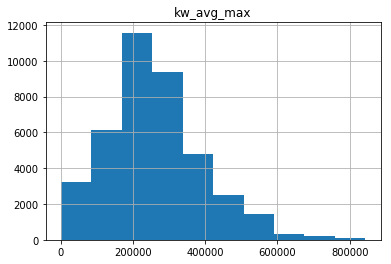

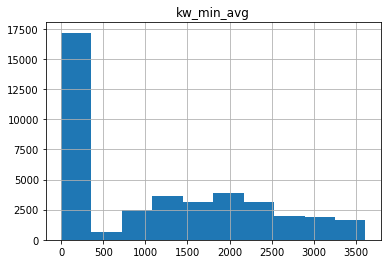

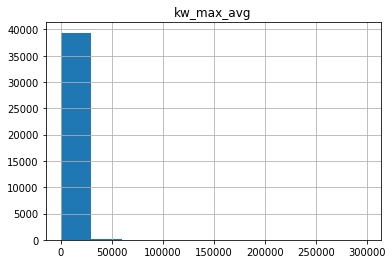

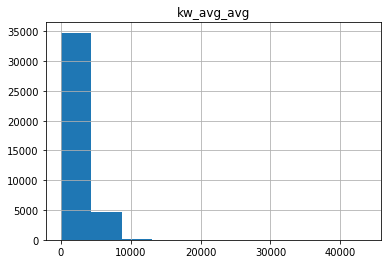

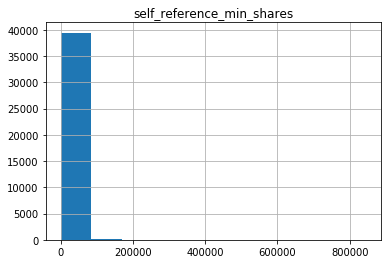

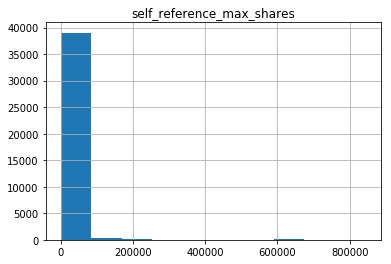

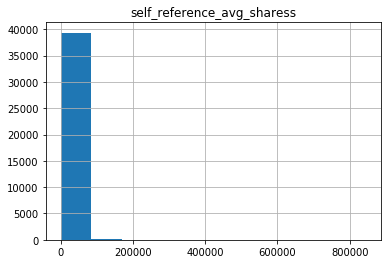

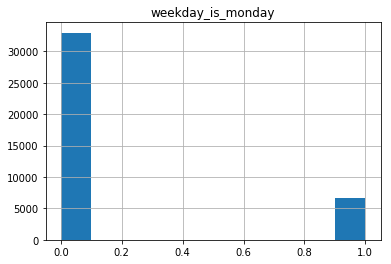

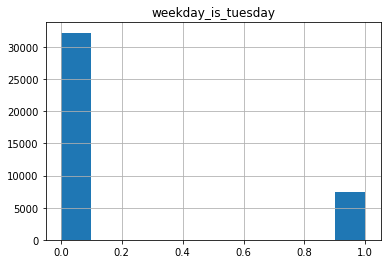

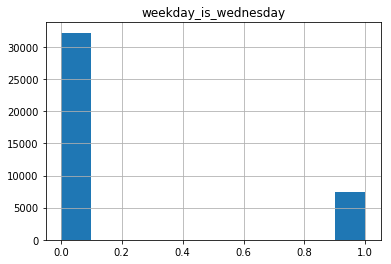

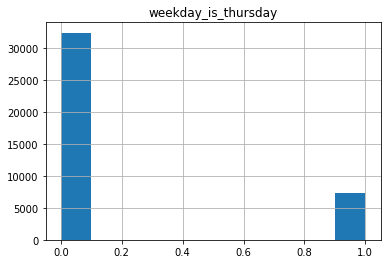

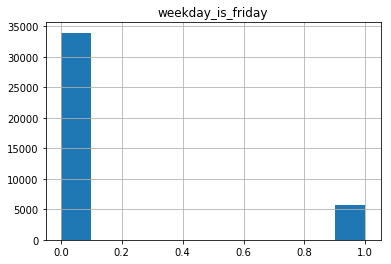

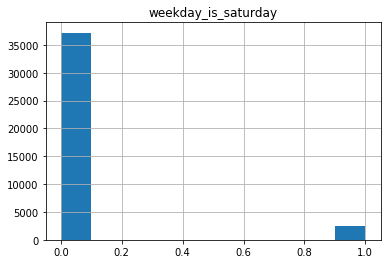

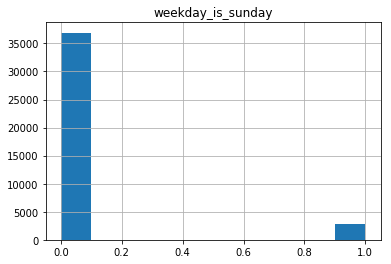

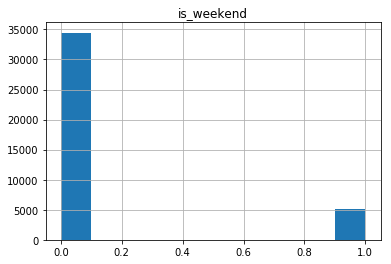

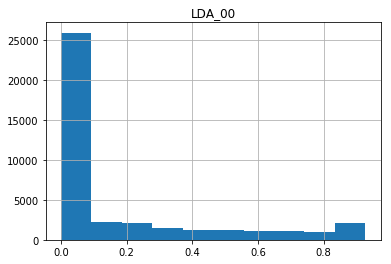

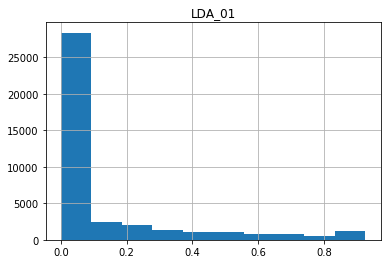

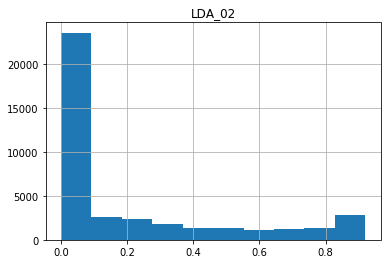

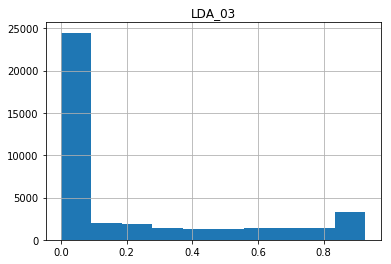

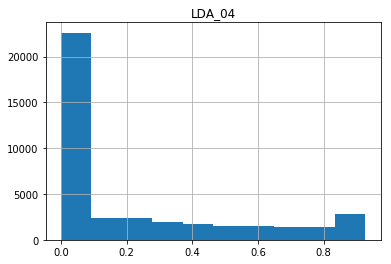

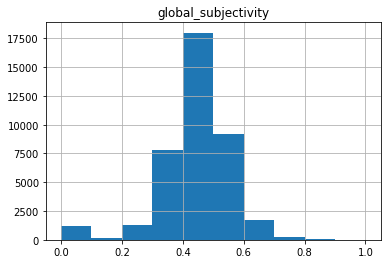

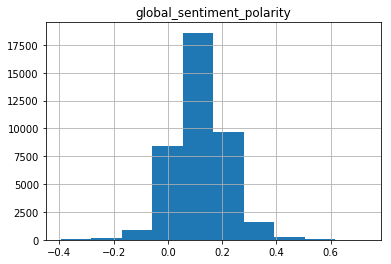

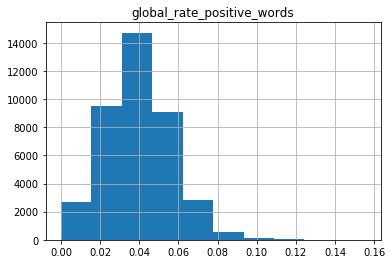

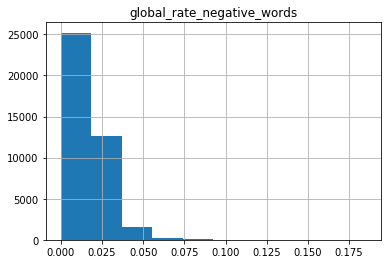

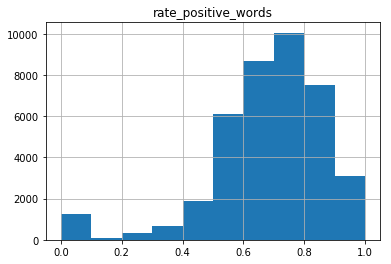

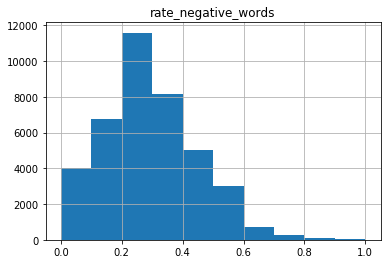

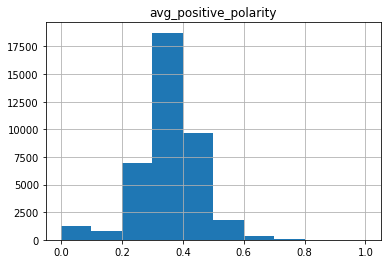

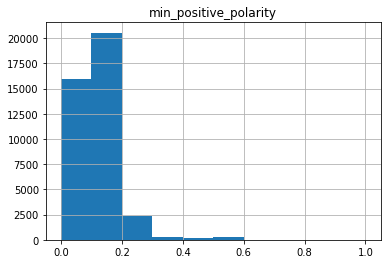

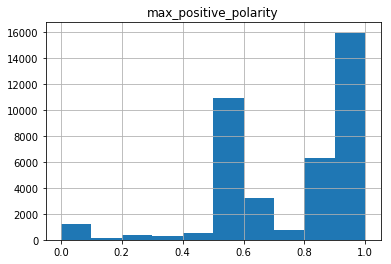

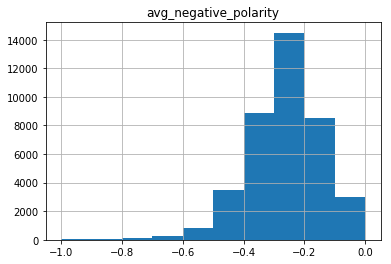

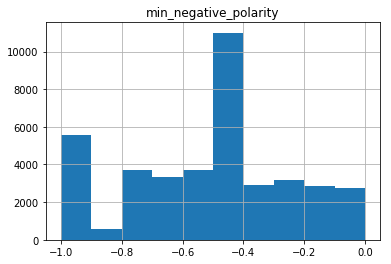

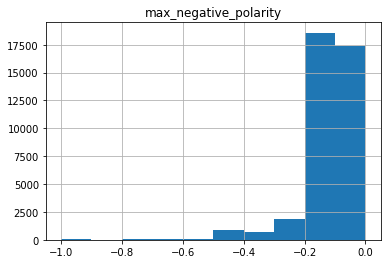

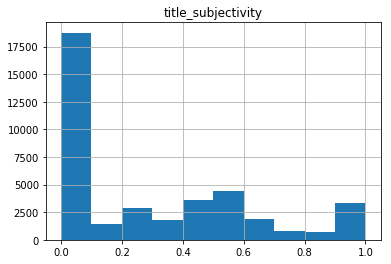

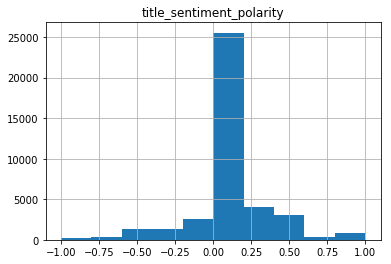

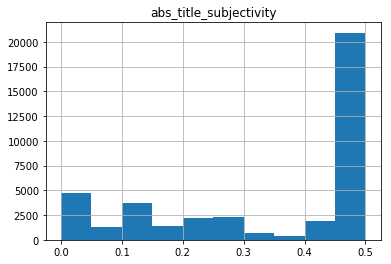

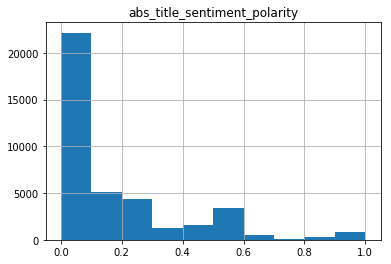

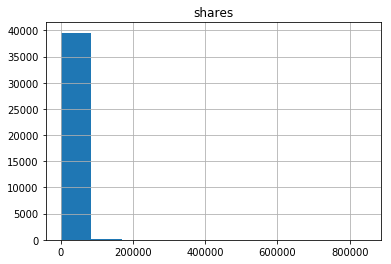

In [0]:
for i in data.iloc[:,0:60]:
    data.hist(i,bins=10)

# Removing the 0 values from  rate_positive_words, rate_negative words, and average_token_length variables

In [0]:
print("number of 0 values in the average_token_length = {}".format(len(data[data.average_token_length == 0])))

print("number of 0 values in the rate_negative_words = {}".format(len(data[data.rate_negative_words == 0])))

print("number of 0 values in the rate_positive_words = {}".format(len(data[data.rate_positive_words == 0])))

number of 0 values in the average_token_length = 1181
number of 0 values in the rate_negative_words = 2550
number of 0 values in the rate_positive_words = 1217


In [0]:
data = data[data.average_token_length != 0]
data = data[data.rate_positive_words + data.rate_negative_words != 0]
data.shape

(38458, 60)

# Data Visualization

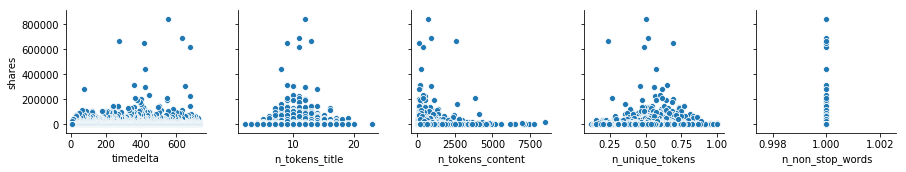

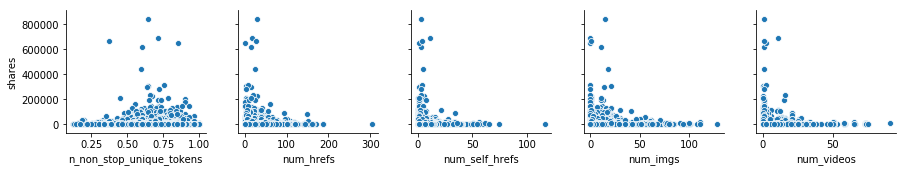

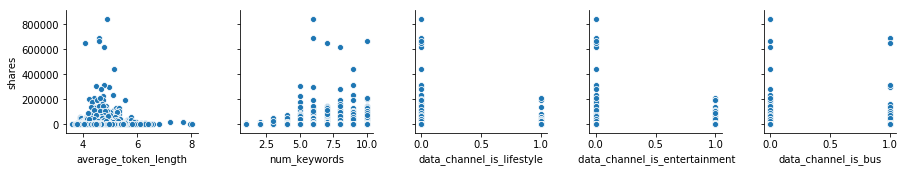

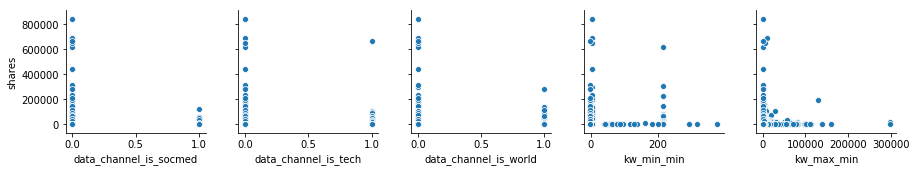

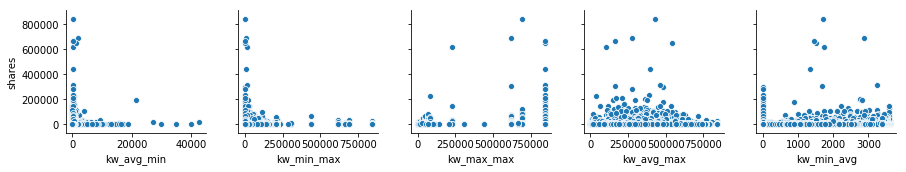

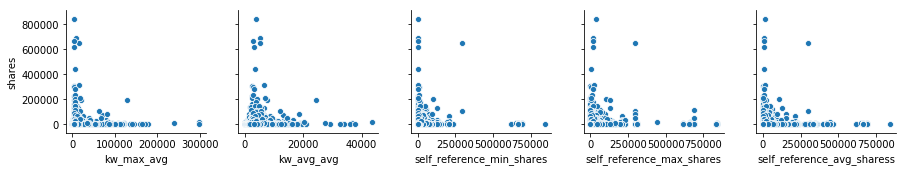

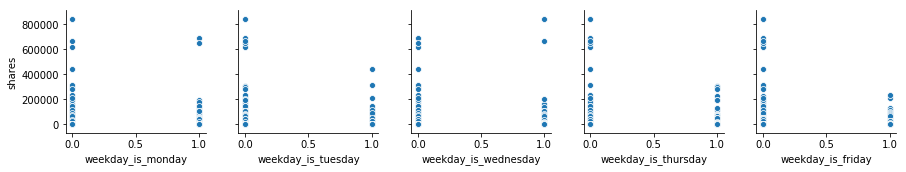

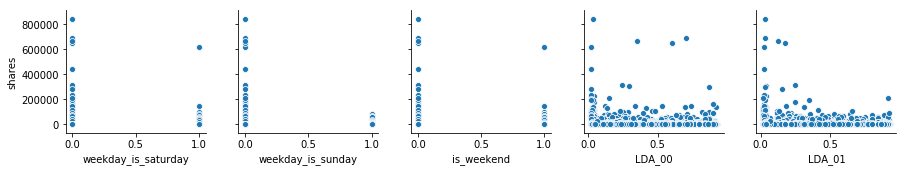

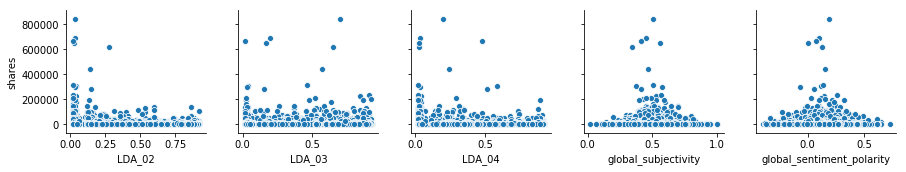

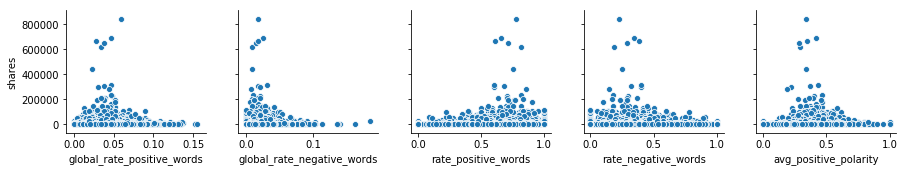

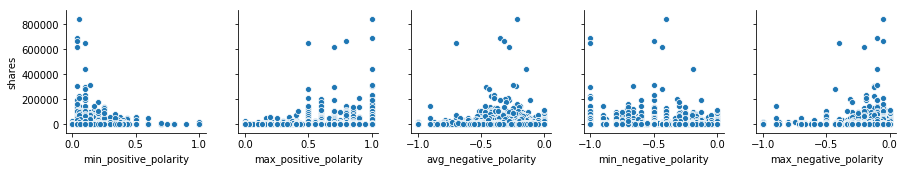

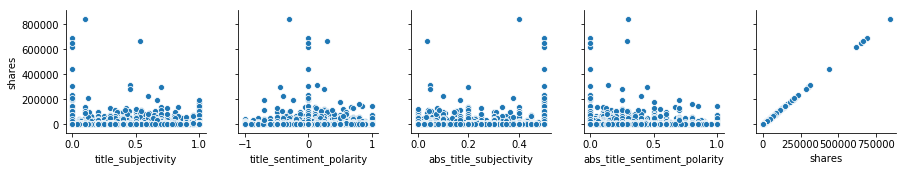

In [0]:
for i in range(0, len(data.columns), 5):
    sns.pairplot(data=data,
                x_vars=data.columns[i:i+5],
                y_vars=['shares'])

From the above pair plots , we can clearly see that following attributes have outliers .

All the records in n_non_stop_words lie in the range from 0 to 1, except 1 record which is 1041 and it has been removed as an outlier. From the data summary of the n_non_stop_words field, where the mean lies at 1 but the maximum value was 1041.

Similarly n_unique_tokens,n_non_stop_unique_tokens ,n_tokens_title , num_hrefs ,num_self_hrefs have outliers .

I will be deleting those observations from those attributes

In [0]:
data = data[data.n_non_stop_words <=1]  
data = data[data.n_unique_tokens <=1]
data = data[data.n_non_stop_unique_tokens<=1]
data = data[data.num_hrefs <200]
data = data[data.num_self_hrefs <100]
data = data[data.n_tokens_title <=20]
        

data.shape

(38455, 60)

# Analysing Data with box plots
A boxplot can show whether a data set is symmetric or skewed . A symmetric data set shows the median roughly in the middle of the box.The median, is shown by the line that cuts through the box in the boxplot.

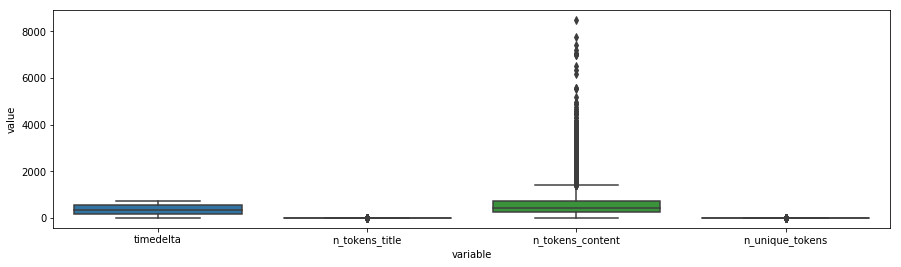

In [0]:
fig, ax = plt.subplots(figsize=(15, 4))
sns.boxplot(x="variable", y = "value", data=pd.melt( data.iloc[:,0:4]))
plt.show()

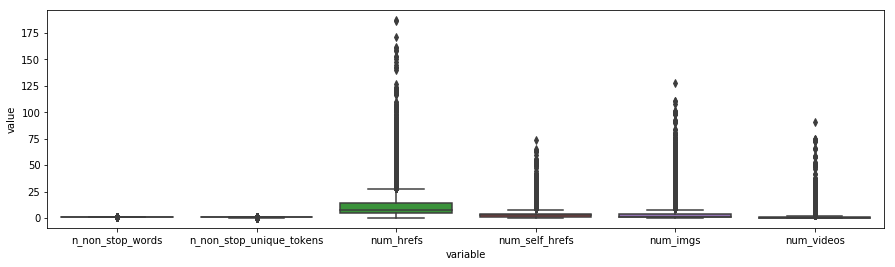

In [0]:
fig, ax = plt.subplots(figsize=(15, 4))
sns.boxplot(x="variable", y = "value", data=pd.melt( data.iloc[:,4:10]))
plt.show()

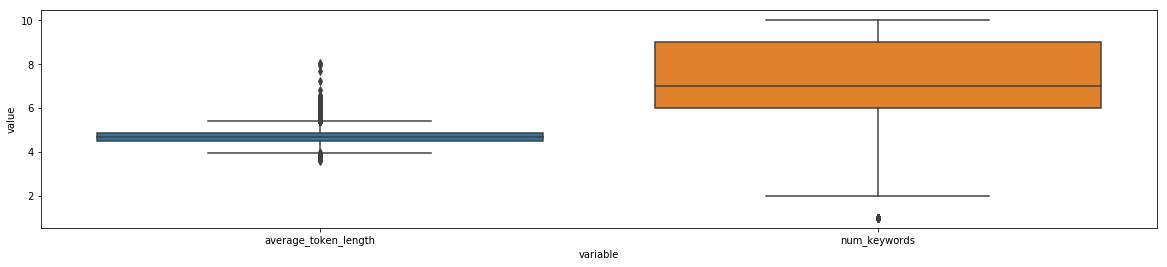

In [0]:
fig, ax = plt.subplots(figsize=(20, 4))
sns.boxplot(x="variable", y = "value", data=pd.melt( data.iloc[:,10:12]))
plt.show()

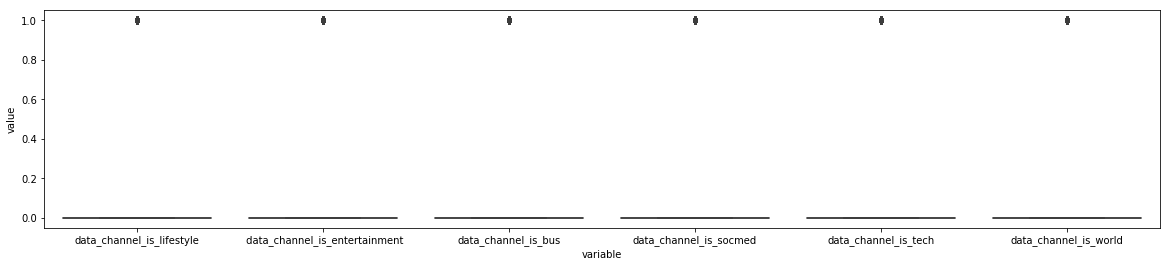

In [0]:
fig, ax = plt.subplots(figsize=(20, 4))
sns.boxplot(x="variable", y = "value", data=pd.melt( data.iloc[:,12:18]))
plt.show()

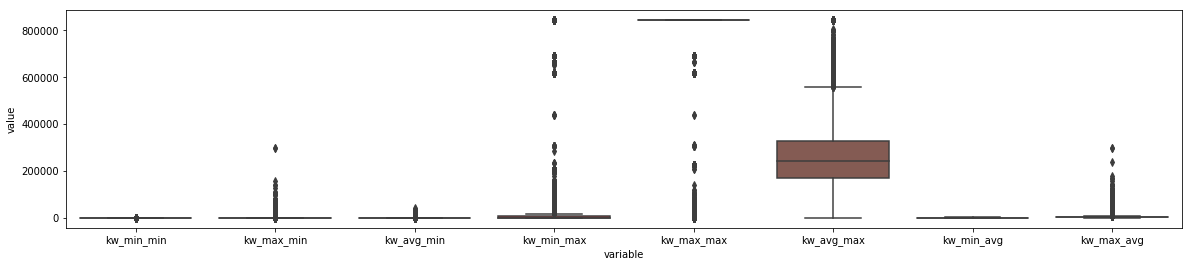

In [0]:
fig, ax = plt.subplots(figsize=(20, 4))
sns.boxplot(x="variable", y = "value", data=pd.melt( data.iloc[:,18:26]))
plt.show()

The keyword-related features are used to describe the maximum, minimum and average shares numbers of best, worst and average keywords. From the above boxplots, we can see that the peaks of these feature are extreme values. We can see many outliers existing in this features.

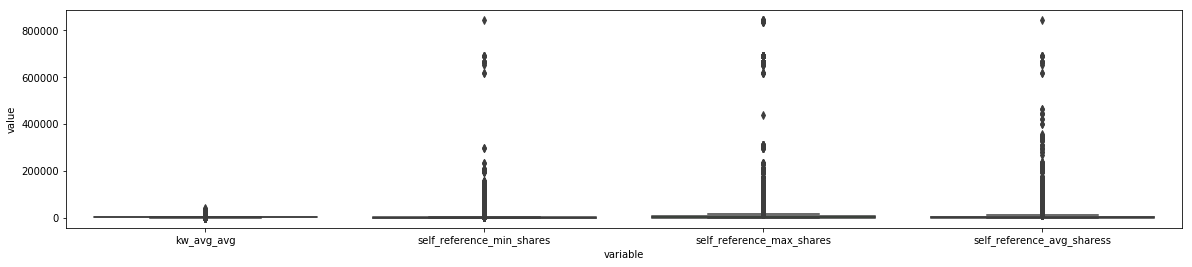

In [0]:
fig, ax = plt.subplots(figsize=(20, 4))
sns.boxplot(x="variable", y = "value", data=pd.melt( data.iloc[:,26:30]))
plt.show()

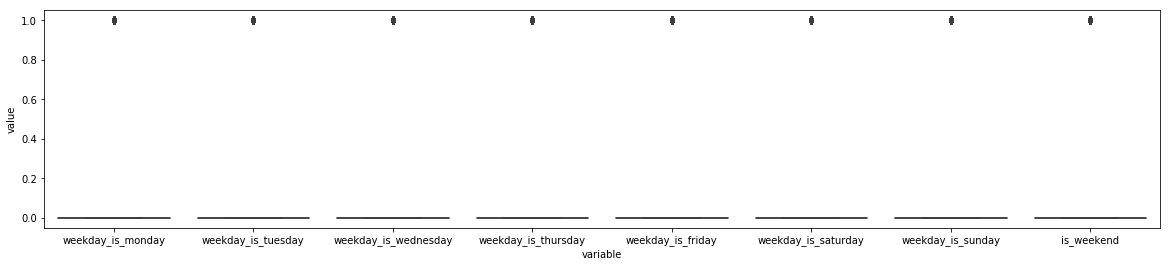

In [0]:
fig, ax = plt.subplots(figsize=(20, 4))
sns.boxplot(x="variable", y = "value", data=pd.melt( data.iloc[:,30:38]))
plt.show()

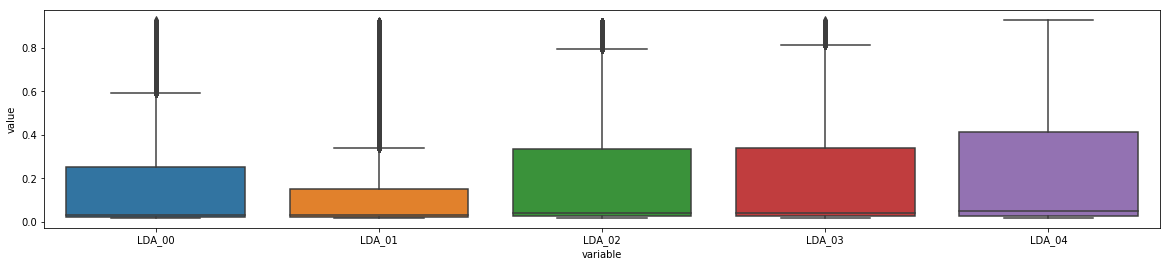

In [0]:
fig, ax = plt.subplots(figsize=(20, 4))
sns.boxplot(x="variable", y = "value", data=pd.melt( data.iloc[:,38:43]))
plt.show()

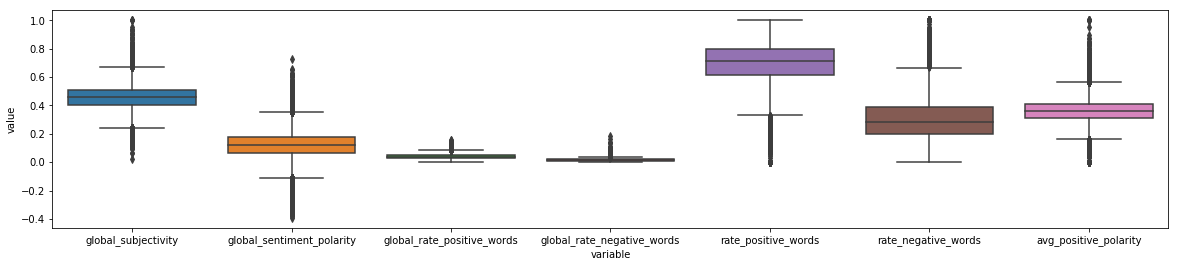

In [0]:
fig, ax = plt.subplots(figsize=(20, 4))
sns.boxplot(x="variable", y = "value", data=pd.melt( data.iloc[:,43:50]))
plt.show()

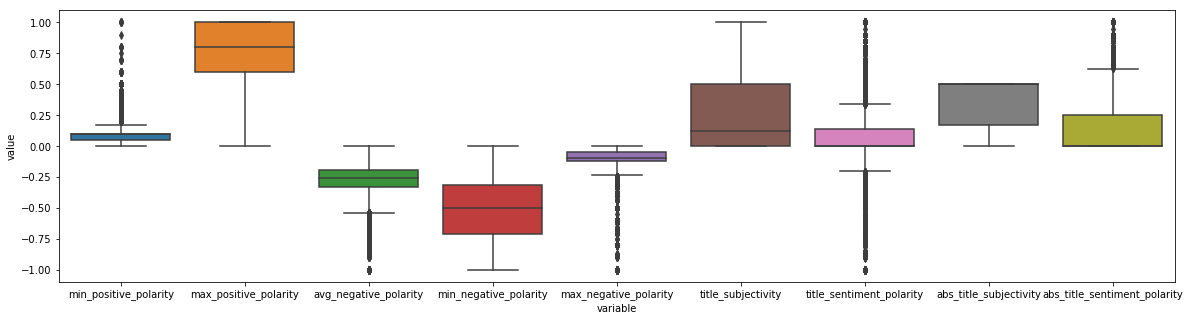

In [0]:
fig, ax = plt.subplots(figsize=(20, 5))
sns.boxplot(x="variable", y = "value", data=pd.melt( data.iloc[:,50:59]))
plt.show()

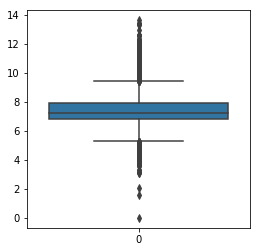

In [0]:
fig, ax = plt.subplots(figsize=(4, 4))
sns.boxplot(data=np.log(data['shares']))
plt.show()

# Removing Outliers  : Using Standard Deviation

In [0]:
shares_stats= data['shares'].describe()
median = round(shares_stats['50%'] , 4) 
STD = round(shares_stats['std'] , 4)        


data_clean = data[data.shares >( median- 2*STD)] 
data_clean = data[data.shares < (median+ 2*STD)]
print(data_clean['shares'].describe())

target = np.log(data_clean.shares)
print(data_clean.shape)
data_clean.head()

count    37895.000000
mean      2538.915134
std       3167.454572
min          1.000000
25%        939.000000
50%       1400.000000
75%       2600.000000
max      24500.000000
Name: shares, dtype: float64
(37895, 60)


,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,average_token_length,num_keywords,data_channel_is_lifestyle,data_channel_is_entertainment,data_channel_is_bus,data_channel_is_socmed,data_channel_is_tech,data_channel_is_world,kw_min_min,kw_max_min,kw_avg_min,kw_min_max,kw_max_max,kw_avg_max,kw_min_avg,kw_max_avg,kw_avg_avg,self_reference_min_shares,self_reference_max_shares,self_reference_avg_sharess,weekday_is_monday,weekday_is_tuesday,weekday_is_wednesday,weekday_is_thursday,weekday_is_friday,weekday_is_saturday,weekday_is_sunday,is_weekend,LDA_00,LDA_01,LDA_02,LDA_03,LDA_04,global_subjectivity,global_sentiment_polarity,global_rate_positive_words,global_rate_negative_words,rate_positive_words,rate_negative_words,avg_positive_polarity,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
0,731.0,12.0,219.0,0.663594,1.0,0.815385,4.0,2.0,1.0,0.0,4.680365,5.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,496.0,496.0,496.000000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.500331,0.378279,0.040005,0.041263,0.040123,0.521617,0.092562,0.045662,0.013699,0.769231,0.230769,0.378636,0.100000,0.7,-0.350000,-0.600,-0.200000,0.500000,-0.187500,0.000000,0.187500,593
1,731.0,9.0,255.0,0.604743,1.0,0.791946,3.0,1.0,1.0,0.0,4.913725,4.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.799756,0.050047,0.050096,0.050101,0.050001,0.341246,0.148948,0.043137,0.015686,0.733333,0.266667,0.286915,0.033333,0.7,-0.118750,-0.125,-0.100000,0.000000,0.000000,0.500000,0.000000,711
2,731.0,9.0,211.0,0.575130,1.0,0.663866,3.0,1.0,1.0,0.0,4.393365,6.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,918.0,918.0,918.000000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.217792,0.033334,0.033351,0.033334,0.682188,0.702222,0.323333,0.056872,0.009479,0.857143,0.142857,0.495833,0.100000,1.0,-0.466667,-0.800,-0.133333,0.000000,0.000000,0.500000,0.000000,1500
3,731.0,9.0,531.0,0.503788,1.0,0.665635,9.0,0.0,1.0,0.0,4.404896,7.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.028573,0.419300,0.494651,0.028905,0.028572,0.429850,0.100705,0.041431,0.020716,0.666667,0.333333,0.385965,0.136364,0.8,-0.369697,-0.600,-0.166667,0.000000,0.000000,0.500000,0.000000,1200
4,731.0,13.0,1072.0,0.415646,1.0,0.540890,19.0,19.0,20.0,0.0,4.682836,7.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,545.0,16000.0,3151.157895,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.028633,0.028794,0.028575,0.028572,0.885427,0.513502,0.281003,0.074627,0.012127,0.860215,0.139785,0.411127,0.033333,1.0,-0.220192,-0.500,-0.050000,0.454545,0.136364,0.045455,0.136364,505


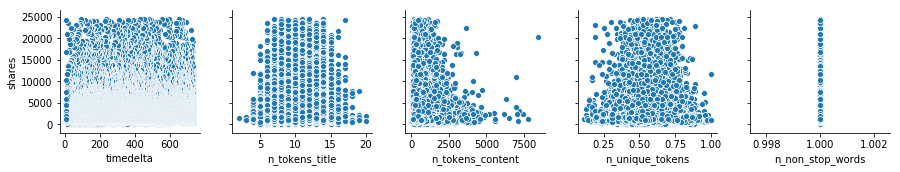

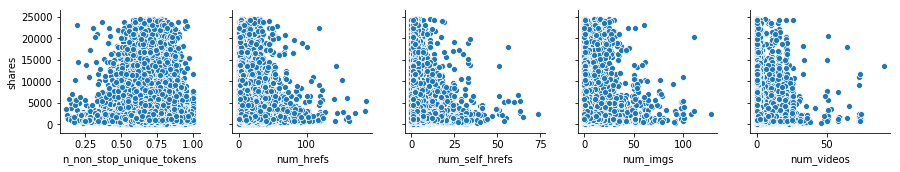

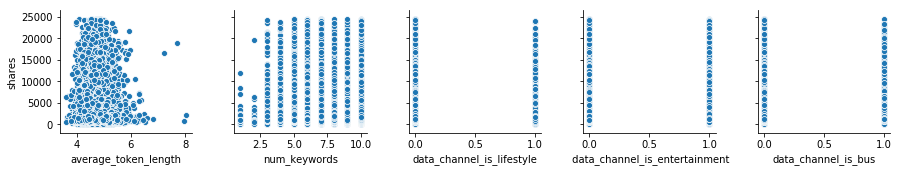

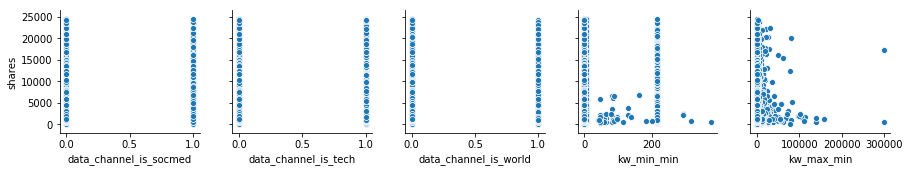

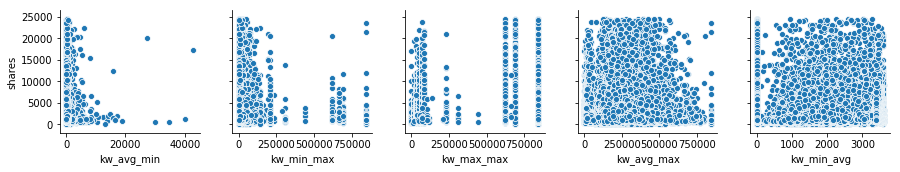

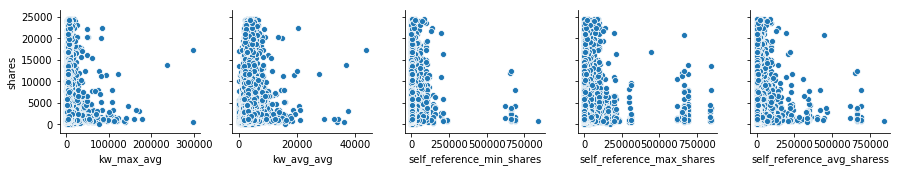

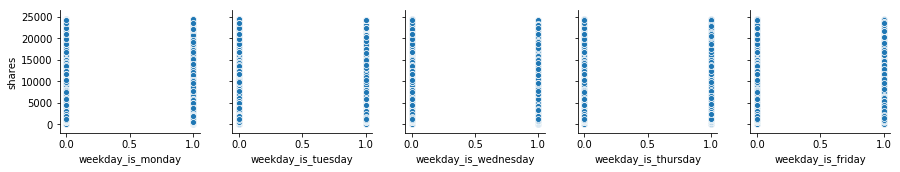

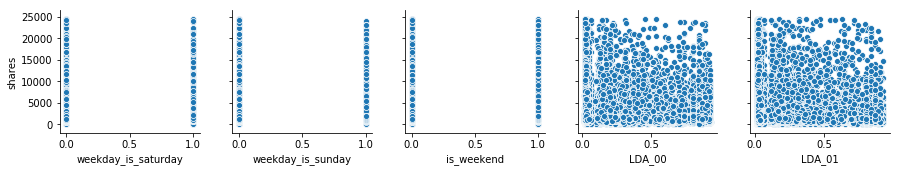

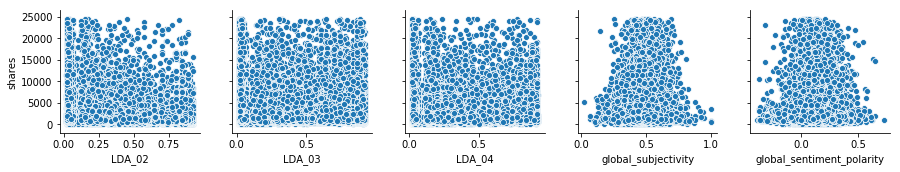

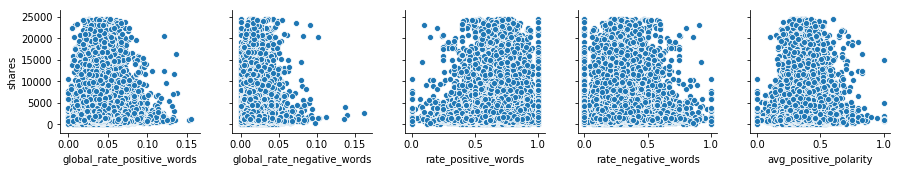

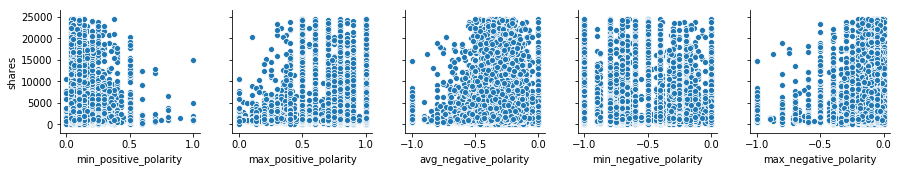

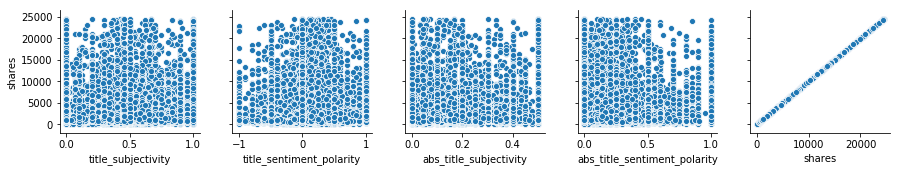

In [0]:
for i in range(0, len(data_clean.columns), 5):
    sns.pairplot(data=data_clean,
                x_vars=data_clean.columns[i:i+5],
                y_vars=['shares'])

# Relation Between (n_tokens_title)Number of words in the title and number of shares
This seems to indicate that , the articles with the most number of shares should have titles that are around 6 to 14 words.

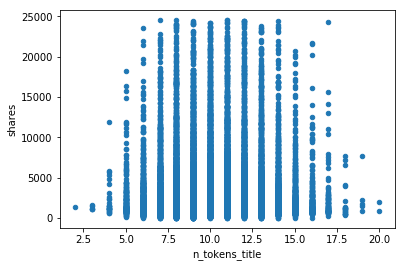

In [0]:
data_clean.plot(x='n_tokens_title' ,  y='shares', kind ='scatter')

# Comparing the Type of the article and the number of shares it gets
From the bar graph it is evident that articles are getting more number of shares when the data channel is either lifestyle or social media

Text(0.5, 1.0, ' Type of article Vs shares')

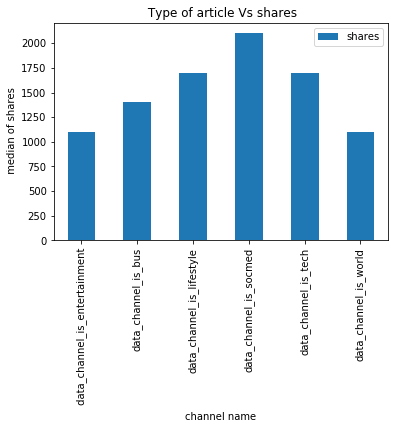

In [0]:
list_channels=['data_channel_is_lifestyle',' data_channel_is_entertainment', 
             'data_channel_is_bus','data_channel_is_socmed', 'data_channel_is_tech',
            'data_channel_is_world']
data_channels=data_clean[list_channels]

channel_name = data_channels.idxmax(axis=1)

channel_name = pd.DataFrame(channel_name,columns=['channel name'])
channel_name['shares']= data_clean['shares']
channels= channel_name.groupby('channel name').median()
channels.plot(kind ='bar')
plt.ylabel("  median of shares ")
plt.title(" Type of article Vs shares")

# comparing the number of shares depending on the day of the week
Box plot for the day article was published and the number of shares is plotted, which showed articles posted on weekend has slightly more shares compared to other news posted on weekdays.

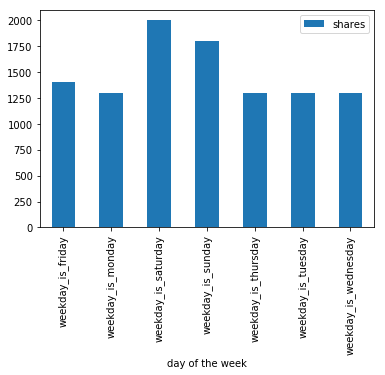

In [0]:
day=['weekday_is_monday','weekday_is_tuesday', 'weekday_is_wednesday',
     'weekday_is_thursday', 'weekday_is_friday',
     'weekday_is_saturday', 'weekday_is_sunday', 'is_weekend']
data_days = data_clean[day]
data_days = data_days.idxmax(axis=1)

data_days = pd.DataFrame(data_days ,columns=['day of the week'])
data_days['shares'] = data_clean['shares']
days = data_days.groupby('day of the week').median()

days.plot(kind = 'bar')



# Correlation between the data

In [0]:
data_correlation= data_clean.corr()
data_correlation

,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
timedelta,1.000000,-0.234937,-0.100132,0.134367,-0.133048,0.106224,-0.027702,0.043984,-0.034336,-0.001365,...,0.019778,0.017189,0.061809,0.121625,-0.032727,-0.013148,0.039031,0.013524,0.000160,0.032128
n_tokens_title,-0.234937,1.000000,0.028698,-0.030337,0.041818,-0.018280,-0.047083,-0.007206,-0.005837,0.051780,...,-0.014947,0.002694,-0.035096,-0.046449,0.003777,0.078799,0.000774,-0.150404,0.041439,-0.022456
n_tokens_content,-0.100132,0.028698,1.000000,-0.749647,0.600906,-0.601860,0.407174,0.286304,0.357715,0.103033,...,-0.324877,0.372527,-0.065180,-0.417767,0.277007,0.012299,0.026986,0.004105,0.020995,0.017937
n_unique_tokens,0.134367,-0.030337,-0.749647,1.000000,-0.796001,0.885550,-0.316561,-0.213162,-0.342929,0.013776,...,0.351051,-0.325912,0.026328,0.340540,-0.276187,0.016383,-0.028449,-0.021811,-0.002211,-0.004406
n_non_stop_words,-0.133048,0.041818,0.600906,-0.796001,1.000000,-0.642804,0.334504,0.183056,0.235453,0.076608,...,-0.411959,0.357150,-0.107529,-0.396972,0.268333,-0.020730,0.012814,0.042104,-0.002388,-0.003204
n_non_stop_unique_tokens,0.106224,-0.018280,-0.601860,0.885550,-0.642804,1.000000,-0.373438,-0.216277,-0.478920,-0.005797,...,0.227327,-0.244462,0.024282,0.232504,-0.176449,-0.013710,-0.043967,-0.003560,-0.030498,-0.031131
num_hrefs,-0.027702,-0.047083,0.407174,-0.316561,0.334504,-0.373438,1.000000,0.382444,0.358032,0.116886,...,-0.128227,0.239314,-0.098839,-0.225291,0.092939,0.051384,0.043019,0.006570,0.063717,0.089037
num_self_hrefs,0.043984,-0.007206,0.286304,-0.213162,0.183056,-0.216277,0.382444,1.000000,0.248614,0.077288,...,-0.114174,0.134239,-0.006274,-0.082485,0.072485,-0.007257,0.029403,0.006399,-0.002432,0.018795
num_imgs,-0.034336,-0.005837,0.357715,-0.342929,0.235453,-0.478920,0.358032,0.248614,1.000000,-0.064671,...,-0.031403,0.179632,-0.072104,-0.141890,0.048395,0.060152,0.046270,-0.012517,0.064239,0.079349
num_videos,-0.001365,0.051780,0.103033,0.013776,0.076608,-0.005797,0.116886,0.077288,-0.064671,1.000000,...,-0.015079,0.136447,-0.116934,-0.139548,0.031579,0.061945,0.023094,-0.023784,0.057759,0.037294


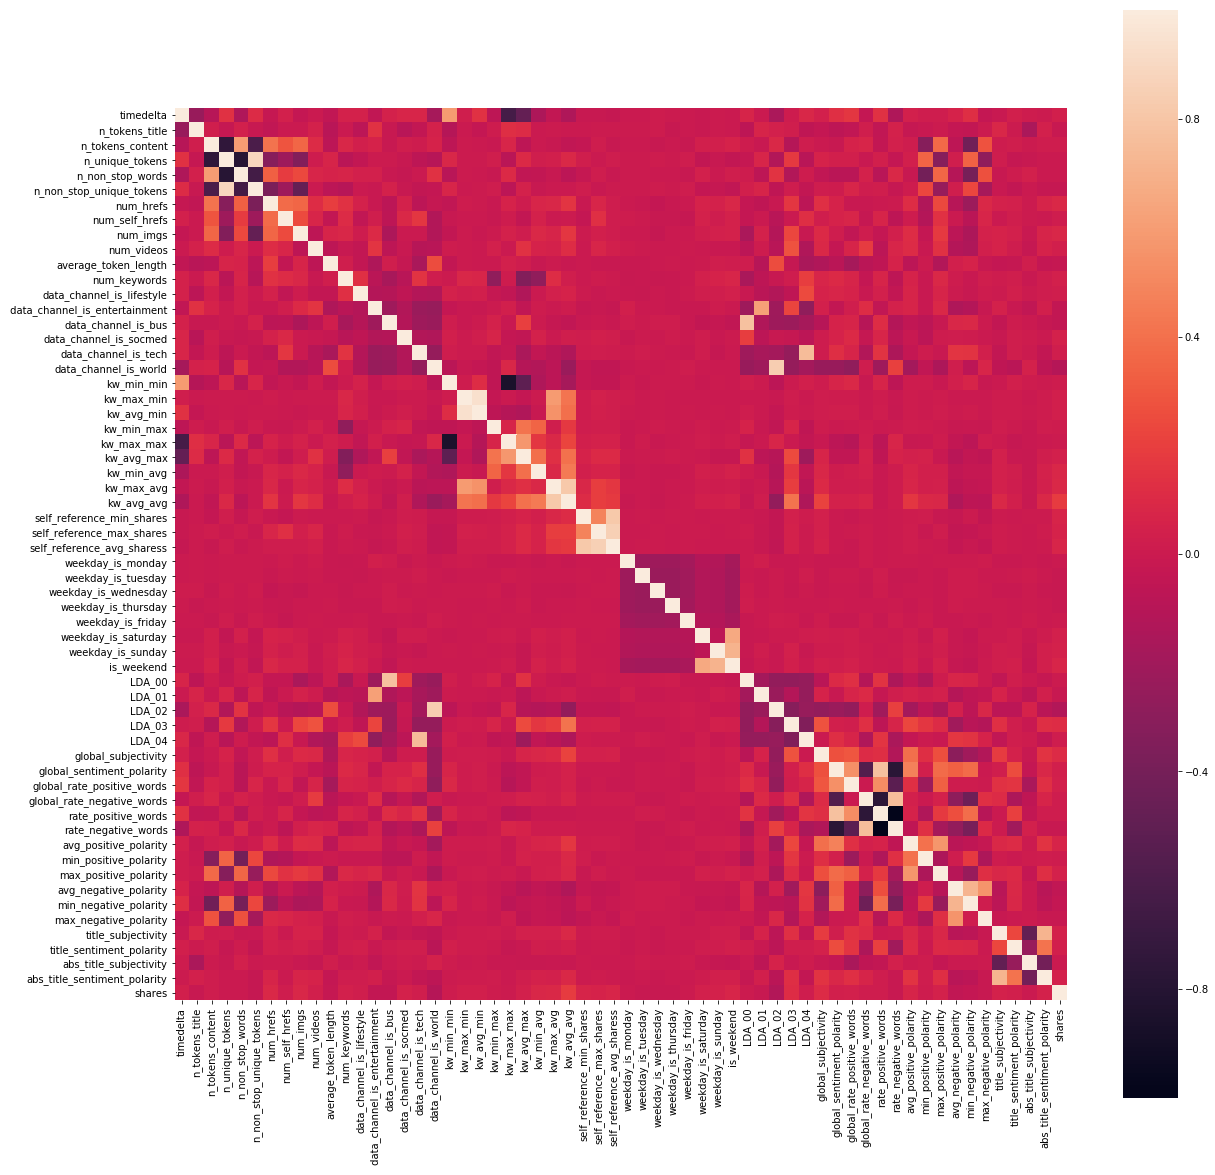

In [0]:
f, ax = plt.subplots(figsize=(20,20))
sns.heatmap(data_correlation, vmax=1,square=True,ax=ax);

plt.show()

In [0]:
#Now we'll try to find which features  that are strongly correlated with shares

data_correlation['shares'].sort_values(ascending=False)[0:10]

shares                        1.000000
kw_avg_avg                    0.180303
LDA_03                        0.116904
global_subjectivity           0.109280
kw_max_avg                    0.092023
num_hrefs                     0.089037
num_imgs                      0.079349
kw_min_avg                    0.079052
self_reference_avg_sharess    0.072245
is_weekend                    0.072025
Name: shares, dtype: float64

# Target Label

This target column(shares) will be the column your classifier will predict, using a combination of the other columns.The objective of this project is to predict whether an article will be popular or non-popular, so I see this as a classification problem.
Now we have to create the target label.
Taking the median of shares as reference,                  
shares > 1400  = 1 , popular           
shares <= 1400 = 0 , unpouplar

In [0]:
df = data_clean.copy()
df.shares.describe()

count    37895.000000
mean      2538.915134
std       3167.454572
min          1.000000
25%        939.000000
50%       1400.000000
75%       2600.000000
max      24500.000000
Name: shares, dtype: float64

In [0]:
def converter(x):
    if(x > 1400):
        return 1
    else:
        return 0

In [0]:
df['target'] = df['shares'].apply(converter)

In [0]:
df.head()

,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,average_token_length,num_keywords,data_channel_is_lifestyle,data_channel_is_entertainment,data_channel_is_bus,data_channel_is_socmed,data_channel_is_tech,data_channel_is_world,kw_min_min,kw_max_min,kw_avg_min,kw_min_max,kw_max_max,kw_avg_max,kw_min_avg,kw_max_avg,kw_avg_avg,self_reference_min_shares,self_reference_max_shares,self_reference_avg_sharess,weekday_is_monday,weekday_is_tuesday,weekday_is_wednesday,weekday_is_thursday,weekday_is_friday,weekday_is_saturday,weekday_is_sunday,is_weekend,LDA_00,LDA_01,LDA_02,LDA_03,LDA_04,global_subjectivity,global_sentiment_polarity,global_rate_positive_words,global_rate_negative_words,rate_positive_words,rate_negative_words,avg_positive_polarity,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares,target
0,731.0,12.0,219.0,0.663594,1.0,0.815385,4.0,2.0,1.0,0.0,4.680365,5.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,496.0,496.0,496.000000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.500331,0.378279,0.040005,0.041263,0.040123,0.521617,0.092562,0.045662,0.013699,0.769231,0.230769,0.378636,0.100000,0.7,-0.350000,-0.600,-0.200000,0.500000,-0.187500,0.000000,0.187500,593,0
1,731.0,9.0,255.0,0.604743,1.0,0.791946,3.0,1.0,1.0,0.0,4.913725,4.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.799756,0.050047,0.050096,0.050101,0.050001,0.341246,0.148948,0.043137,0.015686,0.733333,0.266667,0.286915,0.033333,0.7,-0.118750,-0.125,-0.100000,0.000000,0.000000,0.500000,0.000000,711,0
2,731.0,9.0,211.0,0.575130,1.0,0.663866,3.0,1.0,1.0,0.0,4.393365,6.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,918.0,918.0,918.000000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.217792,0.033334,0.033351,0.033334,0.682188,0.702222,0.323333,0.056872,0.009479,0.857143,0.142857,0.495833,0.100000,1.0,-0.466667,-0.800,-0.133333,0.000000,0.000000,0.500000,0.000000,1500,1
3,731.0,9.0,531.0,0.503788,1.0,0.665635,9.0,0.0,1.0,0.0,4.404896,7.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.028573,0.419300,0.494651,0.028905,0.028572,0.429850,0.100705,0.041431,0.020716,0.666667,0.333333,0.385965,0.136364,0.8,-0.369697,-0.600,-0.166667,0.000000,0.000000,0.500000,0.000000,1200,0
4,731.0,13.0,1072.0,0.415646,1.0,0.540890,19.0,19.0,20.0,0.0,4.682836,7.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,545.0,16000.0,3151.157895,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.028633,0.028794,0.028575,0.028572,0.885427,0.513502,0.281003,0.074627,0.012127,0.860215,0.139785,0.411127,0.033333,1.0,-0.220192,-0.500,-0.050000,0.454545,0.136364,0.045455,0.136364,505,0


In [0]:
df['target'].value_counts()

0    19548
1    18347
Name: target, dtype: int64

Text(0.5, 0, 'Number Of Shares')

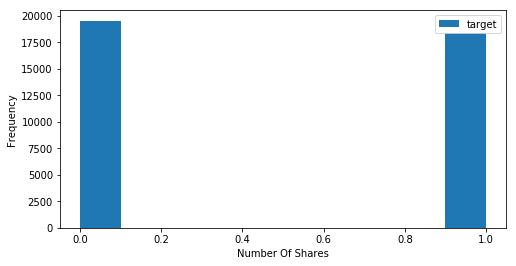

In [0]:
plt.figure(figsize=(8,4))
df['target'].plot.hist(bins=10)
plt.legend()
plt.xlabel('Number Of Shares')

In [0]:

def plot_roc_curve(yt,yp):
    
    false_positive_rate, true_positive_rate, thresholds = roc_curve(yt,yp)
    #false_positive_rate, true_positive_rate, thresholds = metrics.roc_curve(yt,yp,pos_label=2)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    
    
    #print("false positive rate = {}".format(false_positive_rate))
    #print("true positive rate = {}".format(true_positive_rate))
    plt.figure(figsize=(4,4))
    plt.title('Receiver Operating Characteristic')
    plt.plot(false_positive_rate, true_positive_rate, 'b',label='AUC = %0.2f'% roc_auc)
    plt.legend(loc='lower right')
    plt.plot([0,1],[0,1],'r--')
    plt.xlim([0.0,1.0])
    plt.ylim([0.0,1.0])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.grid(True)


In [0]:
def metric_report(y_t,y_p):
    print("Classification Report")
    print(classification_report(y_t,y_p))
    print("Confusion Matrix")
    print(confusion_matrix(y_t,y_p))
    print("Accuracy Score = {}".format(accuracy_score(y_t,y_p)))

In [0]:
def log_reg(xtrain,xtest,ytrain,ytest):
    reg = LogisticRegression(solver='liblinear')
    # train the model using the training sets 
    reg.fit(xtrain,ytrain)
    # making predictions on the testing set 
    ypred = reg.predict(xtest)
    yprobs = reg.predict_proba(xtest)[:, 1]
    #print(yprobs)
    # comparing actual response values (y_test) with predicted response values (y_pred) 
    metric_report(ytest,ypred)
    plot_roc_curve(ytest,ypred)
    #plot_roc_curve(ytest,yprobs)
    return accuracy_score(ytest,ypred)

In [0]:
def knn_model(xtrain,xtest,ytrain,ytest):
    # with PCA data
    knn_accuracy=[]
    k_value = []
    for i in range(1,31):
        knn = KNeighborsClassifier(n_neighbors=i)
        knn.fit(xtrain,ytrain)
        ypred = knn.predict(xtest)
        temp = accuracy_score(ytest,ypred)

        #scores = cross_val_score(knn, X_train_pca,y_train, cv=10, scoring='accuracy')
        #temp = scores.mean

        k_value.append(i)
        knn_accuracy.append(temp)
        #print(i, temp)

    print(max(knn_accuracy))
    k_optimum = k_value[np.argmax(knn_accuracy)]
    print(k_optimum)
    plt.figure(figsize=(10,5))
    plt.plot(range(1,31), knn_accuracy)
    plt.xlabel('Value of K for KNN')
    plt.ylabel(' Accuracy')
    
    #  knn with best k 
    knn = KNeighborsClassifier(n_neighbors=k_optimum)
    knn.fit(xtrain,ytrain)
    ypred = knn.predict(xtest)
    yprobs = knn.predict_proba(xtest)[:, 1]
    metric_report(ytest,ypred)
    plot_roc_curve(ytest,ypred) 
    #plot_roc_curve(ytest,yprobs)
    return accuracy_score(ytest,ypred)

In [0]:
def decision_tree_model(xtrain,xtest,ytrain,ytest):
    # Create Decision Tree classifer object
    dt = DecisionTreeClassifier(criterion = 'gini')
    # Train Decision Tree Classifer
    dt.fit(xtrain,ytrain)
    #Predict the response for test dataset
    ypred = dt.predict(xtest)
    yprobs = dt.predict_proba(xtest)[:, 1]
    metric_report(ytest,ypred)
    plot_roc_curve(ytest,ypred)
    #plot_roc_curve(ytest,yprobs)
    return accuracy_score(ytest,ypred)

In [0]:
def random_forest_model(xtrain,xtest,ytrain,ytest):
    RF = RandomForestClassifier(n_estimators = 100)
    RF.fit(xtrain,ytrain)
    #Predict the response for test dataset
    ypred = RF.predict(xtest)    
    yprobs = RF.predict_proba(xtest)[:, 1]
    metric_report(ytest,ypred)
    plot_roc_curve(ytest,ypred)
    #plot_roc_curve(ytest,yprobs)
    return accuracy_score(ytest,ypred)

In [0]:
def svm_model(xtrain,xtest,ytrain,ytest):
    svm = LinearSVC()
    svm.fit(xtrain,ytrain)
    # making predictions on the testing set 
    ypred = svm.predict(xtest) 
    #yprobs = svm.predict_proba(xtest)[:, 1]
    metric_report(ytest,ypred)
    plot_roc_curve(ytest,ypred)  
    #plot_roc_curve(ytest,yprobs)
    return accuracy_score(ytest,ypred)
    

In [0]:
X = df.iloc[:,0:59].values
y = df.iloc[:,60].values


# Classification with Original data 

In [0]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)  
X_train.shape, y_train.shape

((26526, 59), (26526,))

*******************Logistic regression with original data******************
Classification Report
              precision    recall  f1-score   support

           0       0.60      0.68      0.64      3936
           1       0.60      0.51      0.55      3643

   micro avg       0.60      0.60      0.60      7579
   macro avg       0.60      0.60      0.59      7579
weighted avg       0.60      0.60      0.60      7579

Confusion Matrix
[[2680 1256]
 [1779 1864]]
Accuracy Score = 0.5995513920042221


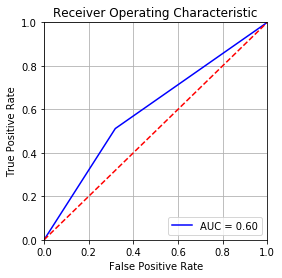

In [0]:
print("*******************Logistic regression with original data******************")
LR1 = log_reg(X_train, X_test, y_train, y_test)


*******************K Nearest Neigbors with original data******************
0.5849056603773585
27
Classification Report
              precision    recall  f1-score   support

           0       0.59      0.66      0.62      3936
           1       0.58      0.51      0.54      3643

   micro avg       0.58      0.58      0.58      7579
   macro avg       0.58      0.58      0.58      7579
weighted avg       0.58      0.58      0.58      7579

Confusion Matrix
[[2584 1352]
 [1794 1849]]
Accuracy Score = 0.5849056603773585


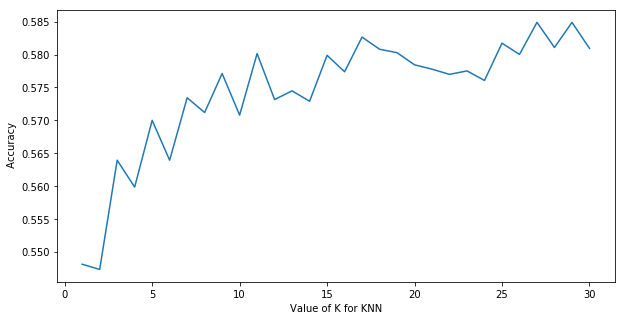

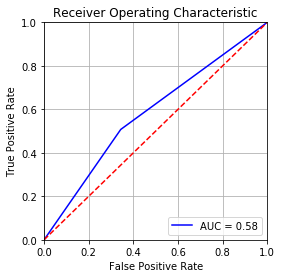

In [0]:
print("*******************K Nearest Neigbors with original data******************")
KNN1 = knn_model(X_train, X_test, y_train, y_test)

*******************Decision Tree with original data******************
Classification Report
              precision    recall  f1-score   support

           0       0.60      0.60      0.60      3936
           1       0.57      0.57      0.57      3643

   micro avg       0.59      0.59      0.59      7579
   macro avg       0.59      0.59      0.59      7579
weighted avg       0.59      0.59      0.59      7579

Confusion Matrix
[[2364 1572]
 [1550 2093]]
Accuracy Score = 0.5880723050534371


C:\Users\lakshya_hanshvik\Anaconda3\lib\site-packages\sklearn\metrics\ranking.py:656: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  UndefinedMetricWarning)


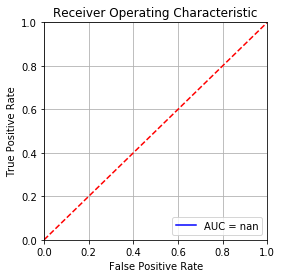

In [0]:
print("*******************Decision Tree with original data******************")
DT1 = decision_tree_model(X_train, X_test, y_train, y_test)

********************* Random Forest with original Data
Classification Report
              precision    recall  f1-score   support

           0       0.68      0.70      0.69      3936
           1       0.66      0.64      0.65      3643

   micro avg       0.67      0.67      0.67      7579
   macro avg       0.67      0.67      0.67      7579
weighted avg       0.67      0.67      0.67      7579

Confusion Matrix
[[2746 1190]
 [1313 2330]]
Accuracy Score = 0.669745348990632


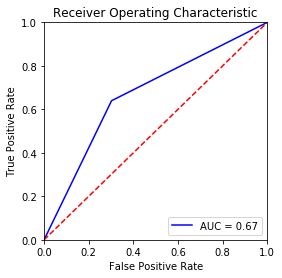

In [0]:
print("********************* Random Forest with original Data")
RF1 =  random_forest_model(X_train, X_test, y_train, y_test)

********************* SVM with original Data*****************************


C:\Users\lakshya_hanshvik\Anaconda3\lib\site-packages\sklearn\svm\base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Classification Report
              precision    recall  f1-score   support

           0       0.58      0.66      0.62      3936
           1       0.57      0.48      0.52      3643

   micro avg       0.57      0.57      0.57      7579
   macro avg       0.57      0.57      0.57      7579
weighted avg       0.57      0.57      0.57      7579

Confusion Matrix
[[2586 1350]
 [1886 1757]]
Accuracy Score = 0.5730307428420636


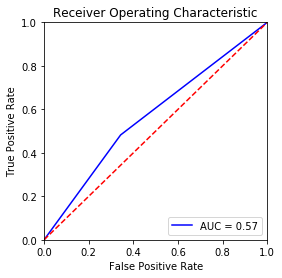

In [0]:
print("********************* SVM with original Data*****************************")
SVM1 =  svm_model(X_train, X_test, y_train, y_test)

#   Normalize the dataset

In [0]:
sc = StandardScaler()  
X_train = sc.fit_transform(X_train)  
X_test = sc.transform(X_test)  

X1 = sc.fit_transform(X)


# Classification on Normalized Data

*******************Logistic regression with Normalized Data******************
Classification Report
              precision    recall  f1-score   support

           0       0.60      0.68      0.64      3936
           1       0.60      0.51      0.55      3643

   micro avg       0.60      0.60      0.60      7579
   macro avg       0.60      0.60      0.59      7579
weighted avg       0.60      0.60      0.60      7579

Confusion Matrix
[[2680 1256]
 [1779 1864]]
Accuracy Score = 0.5995513920042221


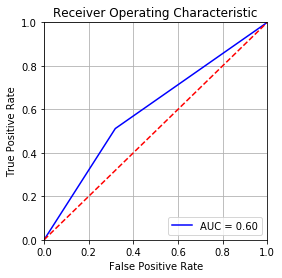

In [0]:
print("*******************Logistic regression with Normalized Data******************")
LR2 = log_reg(X_train, X_test, y_train, y_test)

*******************KNN with Normalized Data******************
0.5849056603773585
27
Classification Report
              precision    recall  f1-score   support

           0       0.59      0.66      0.62      3936
           1       0.58      0.51      0.54      3643

   micro avg       0.58      0.58      0.58      7579
   macro avg       0.58      0.58      0.58      7579
weighted avg       0.58      0.58      0.58      7579

Confusion Matrix
[[2584 1352]
 [1794 1849]]
Accuracy Score = 0.5849056603773585


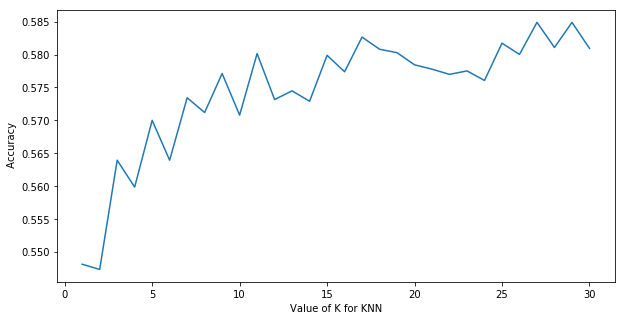

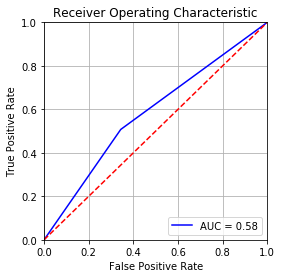

In [0]:
print("*******************KNN with Normalized Data******************")
KNN2 = knn_model(X_train, X_test, y_train, y_test)

*******************Decision Tree with Normalized Data******************
Classification Report
              precision    recall  f1-score   support

           0       0.60      0.60      0.60      3936
           1       0.57      0.57      0.57      3643

   micro avg       0.58      0.58      0.58      7579
   macro avg       0.58      0.58      0.58      7579
weighted avg       0.58      0.58      0.58      7579

Confusion Matrix
[[2355 1581]
 [1580 2063]]
Accuracy Score = 0.5829265074548093


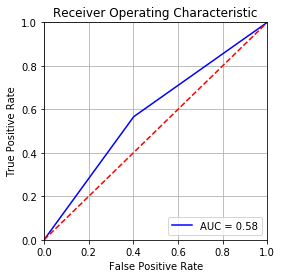

In [0]:
print("*******************Decision Tree with Normalized Data******************")
DT2 = decision_tree_model(X_train, X_test, y_train, y_test)

********************* Random Forest with Normalized Data****************
Classification Report
              precision    recall  f1-score   support

           0       0.68      0.70      0.69      3936
           1       0.66      0.64      0.65      3643

   micro avg       0.67      0.67      0.67      7579
   macro avg       0.67      0.67      0.67      7579
weighted avg       0.67      0.67      0.67      7579

Confusion Matrix
[[2745 1191]
 [1319 2324]]
Accuracy Score = 0.6688217442934424


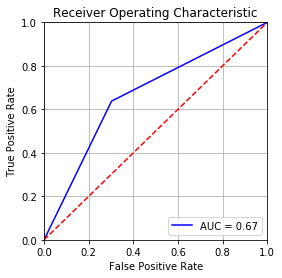

In [0]:
print("********************* Random Forest with Normalized Data****************")
RF2 =  random_forest_model(X_train, X_test, y_train, y_test)

********************* SVM with original Data*****************************


C:\Users\lakshya_hanshvik\Anaconda3\lib\site-packages\sklearn\svm\base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Classification Report
              precision    recall  f1-score   support

           0       0.64      0.25      0.36      3936
           1       0.51      0.84      0.64      3643

   micro avg       0.54      0.54      0.54      7579
   macro avg       0.57      0.55      0.50      7579
weighted avg       0.58      0.54      0.49      7579

Confusion Matrix
[[ 998 2938]
 [ 570 3073]]
Accuracy Score = 0.537142103179839


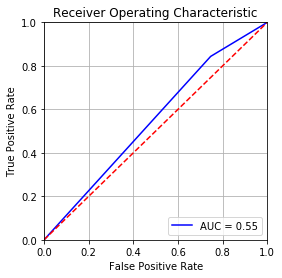

In [0]:
print("********************* SVM with original Data*****************************")
SVM2 =  svm_model(X_train, X_test, y_train, y_test)

# Dimensionality Reduction
# Principal Component Analysis (PCA) :                                                   
This technique extracts some amount of the features from the original dataset. These extracted features/variables are called Principal Components. The main motive behind this technique is to extract a low dimensional set of features from a high dimensional dataset. And it is more useful when we are dealing with 3 or high dimensional data.                

A principal component is a linear combination of the original variables.                
Principal components are extracted in such a way that the first principal component explains maximum variance in the dataset.    Second principal component tries to explain the remaining variance in the dataset and is uncorrelated to the first principal component.                    
Third principal component tries to explain the variance which is not explained by the first two principal components and so on

In [0]:
pca = PCA(n_components=30)  
X_train_pca = pca.fit_transform(X_train)  
X_test_pca = pca.transform(X_test)  

In [0]:
explained_variance = pca.explained_variance_ratio_  
print(explained_variance)

[0.08294743 0.07408999 0.06919781 0.05204822 0.04758908 0.04101512
 0.03978077 0.03661278 0.03516106 0.03381568 0.03062233 0.02855194
 0.02577687 0.02424    0.02142973 0.02085175 0.02063675 0.02044592
 0.01998607 0.01904533 0.01886952 0.01791206 0.01666272 0.01561692
 0.01506673 0.01306465 0.01242018 0.01150384 0.01125476 0.01106256]


Text(0, 0.5, 'cumulative explained variance')

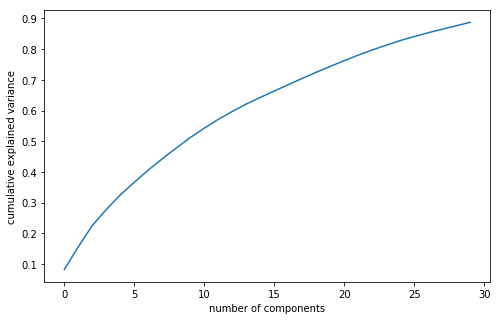

In [0]:
plt.figure(figsize=(8,5))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')


# Classification after PCA

*******************Logistic Regression with PCA data******************
Classification Report
              precision    recall  f1-score   support

           0       0.65      0.68      0.67      3936
           1       0.64      0.61      0.62      3643

   micro avg       0.65      0.65      0.65      7579
   macro avg       0.65      0.64      0.64      7579
weighted avg       0.65      0.65      0.65      7579

Confusion Matrix
[[2681 1255]
 [1430 2213]]
Accuracy Score = 0.6457316268637023


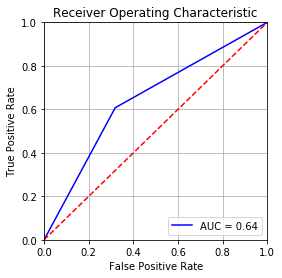

In [0]:
print("*******************Logistic Regression with PCA data******************")
LR3 = log_reg(X_train_pca, X_test_pca, y_train, y_test)

*******************KNN with PCA data******************
0.6360997493072965
29
Classification Report
              precision    recall  f1-score   support

           0       0.63      0.71      0.67      3936
           1       0.64      0.56      0.60      3643

   micro avg       0.64      0.64      0.64      7579
   macro avg       0.64      0.63      0.63      7579
weighted avg       0.64      0.64      0.63      7579

Confusion Matrix
[[2778 1158]
 [1600 2043]]
Accuracy Score = 0.6360997493072965


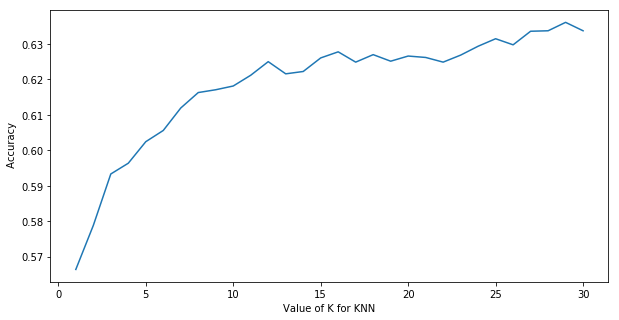

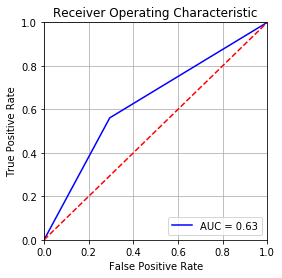

In [0]:
print("*******************KNN with PCA data******************")
KNN3 = knn_model(X_train_pca, X_test_pca, y_train, y_test)

*******************Decision Tree with PCA data******************
Classification Report
              precision    recall  f1-score   support

           0       0.58      0.57      0.57      3936
           1       0.54      0.55      0.54      3643

   micro avg       0.56      0.56      0.56      7579
   macro avg       0.56      0.56      0.56      7579
weighted avg       0.56      0.56      0.56      7579

Confusion Matrix
[[2243 1693]
 [1650 1993]]
Accuracy Score = 0.5589127853278797


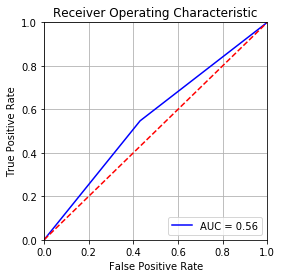

In [0]:
print("*******************Decision Tree with PCA data******************")
DT3 = decision_tree_model(X_train_pca, X_test_pca, y_train, y_test)

********************* Random Forest with Normalized Data****************
Classification Report
              precision    recall  f1-score   support

           0       0.65      0.67      0.66      3936
           1       0.63      0.61      0.62      3643

   micro avg       0.64      0.64      0.64      7579
   macro avg       0.64      0.64      0.64      7579
weighted avg       0.64      0.64      0.64      7579

Confusion Matrix
[[2644 1292]
 [1419 2224]]
Accuracy Score = 0.6423010951312839


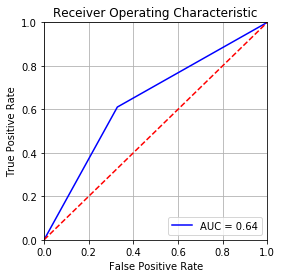

In [0]:
print("********************* Random Forest with Normalized Data****************")
RF3 =  random_forest_model(X_train_pca, X_test_pca, y_train, y_test)

********************* SVM with original Data*****************************


C:\Users\lakshya_hanshvik\Anaconda3\lib\site-packages\sklearn\svm\base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Classification Report
              precision    recall  f1-score   support

           0       0.65      0.68      0.67      3936
           1       0.64      0.60      0.62      3643

   micro avg       0.64      0.64      0.64      7579
   macro avg       0.64      0.64      0.64      7579
weighted avg       0.64      0.64      0.64      7579

Confusion Matrix
[[2688 1248]
 [1450 2193]]
Accuracy Score = 0.644016360997493


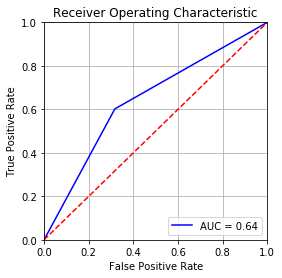

In [0]:
print("********************* SVM with original Data*****************************")
SVM3 =  svm_model(X_train_pca, X_test_pca, y_train, y_test)

# Feature Selection Using Random Forest
Random Forests are often used for feature selection in a data science workflow. The reason is because the tree-based strategies used by random forests naturally ranks by how well they improve the purity of the node. This mean decrease in impurity over all trees (called gini impurity). Nodes with the greatest decrease in impurity happen at the start of the trees, while notes with the least decrease in impurity occur at the end of trees. Thus, by pruning trees below a particular node, we can create a subset of the most important features.

In [0]:
# Create a random forest classifier
clf = RandomForestClassifier(n_estimators=500, random_state=0, n_jobs=-1)

# Train the classifier
clf.fit(X_train, y_train)

# Print the name and gini importance of each feature

sort_features=dict(zip(df.columns[0:59], clf.feature_importances_))
cols = sorted(sort_features, key=lambda x: sort_features[x] , reverse=True)
for i in cols:
    print(i +'---', round(sort_features[i],4))

kw_avg_avg--- 0.0402
kw_max_avg--- 0.036
self_reference_min_shares--- 0.0309
LDA_02--- 0.0304
timedelta--- 0.0294
self_reference_avg_sharess--- 0.029
kw_avg_max--- 0.0273
LDA_01--- 0.0273
LDA_04--- 0.0271
LDA_00--- 0.0268
global_subjectivity--- 0.0266
kw_avg_min--- 0.0266
n_unique_tokens--- 0.0261
n_non_stop_unique_tokens--- 0.0259
average_token_length--- 0.0257
avg_positive_polarity--- 0.025
global_rate_positive_words--- 0.0249
global_sentiment_polarity--- 0.0249
LDA_03--- 0.0244
n_tokens_content--- 0.0243
kw_max_min--- 0.0239
n_non_stop_words--- 0.0237
avg_negative_polarity--- 0.0233
self_reference_max_shares--- 0.0232
global_rate_negative_words--- 0.0229
kw_min_avg--- 0.0221
num_hrefs--- 0.0203
rate_negative_words--- 0.02
rate_positive_words--- 0.0199
kw_min_max--- 0.0156
n_tokens_title--- 0.0146
min_negative_polarity--- 0.0142
title_sentiment_polarity--- 0.0139
max_negative_polarity--- 0.0136
num_imgs--- 0.0133
min_positive_polarity--- 0.0126
num_self_hrefs--- 0.0126
title_subjecti

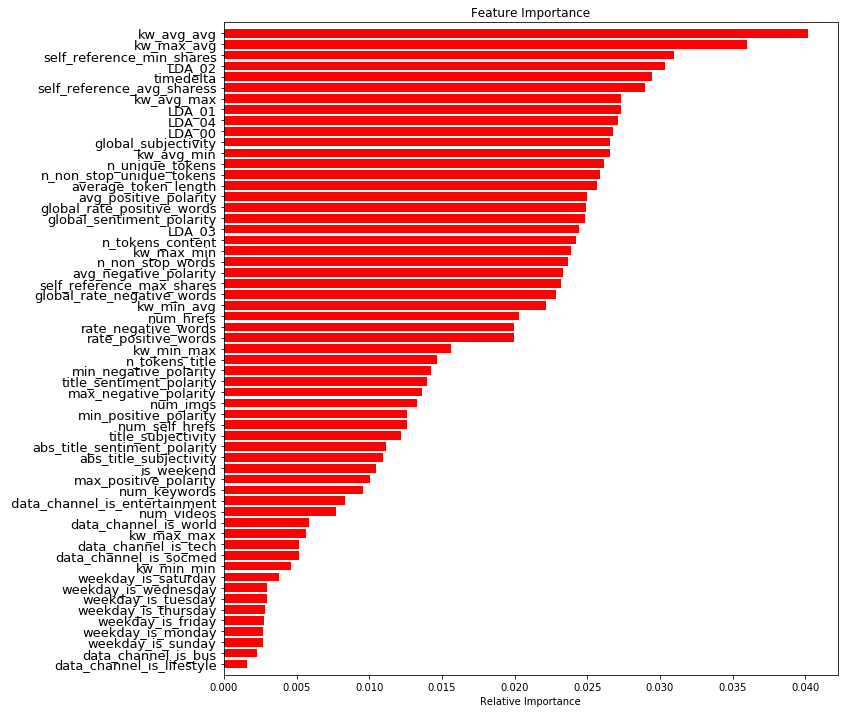

In [0]:
importance = clf.feature_importances_
sorted_importances = np.argsort(importance)
    
from pylab import rcParams
rcParams['figure.figsize']=11,12

plt.barh(range(X_train.shape[1]), importance[sorted_importances], color="r", align="center")
# Customize the plot
plt.yticks(range(X_train.shape[1]), df.columns[sorted_importances], fontsize=13)
plt.xlabel("Relative Importance")
plt.ylim([-1, X_train.shape[1]])
plt.title("Feature Importance")
plt.show()

Identify And Select Most Important Features

In [0]:
# Create a selector object that will use the random forest classifier to identify
# features that have an importance of more than 0.15
sfm = SelectFromModel(clf, threshold=0.015)

# Train the selector
sfm.fit(X_train, y_train)

SelectFromModel(estimator=RandomForestClassifier(bootstrap=True,
                                                 class_weight=None,
                                                 criterion='gini',
                                                 max_depth=None,
                                                 max_features='auto',
                                                 max_leaf_nodes=None,
                                                 min_impurity_decrease=0.0,
                                                 min_impurity_split=None,
                                                 min_samples_leaf=1,
                                                 min_samples_split=2,
                                                 min_weight_fraction_leaf=0.0,
                                                 n_estimators=500, n_jobs=-1,
                                                 oob_score=False,
                                                 random_state=0, verbose=0,
       

In [0]:
# Print the names of the most important features
#count=0
for feature_list_index in sfm.get_support(indices=True):
    print(df.columns[0:59][feature_list_index])
    #count += 1
#print(count)

timedelta
n_tokens_content
n_unique_tokens
n_non_stop_words
n_non_stop_unique_tokens
num_hrefs
average_token_length
kw_max_min
kw_avg_min
kw_min_max
kw_avg_max
kw_min_avg
kw_max_avg
kw_avg_avg
self_reference_min_shares
self_reference_max_shares
self_reference_avg_sharess
LDA_00
LDA_01
LDA_02
LDA_03
LDA_04
global_subjectivity
global_sentiment_polarity
global_rate_positive_words
global_rate_negative_words
rate_positive_words
rate_negative_words
avg_positive_polarity
avg_negative_polarity


Create A Data Subset With Only The Most Important Features


In [0]:
# Transform the data to create a new dataset containing only the most important features
# Note: We have to apply the transform to both the training X and test X data.
X_train_FS = sfm.transform(X_train)
X_test_FS = sfm.transform(X_test)

# Classification after Feature selection

******************** Logistic Regression after Feature selection
Classification Report
              precision    recall  f1-score   support

           0       0.62      0.69      0.65      3936
           1       0.62      0.55      0.58      3643

   micro avg       0.62      0.62      0.62      7579
   macro avg       0.62      0.62      0.62      7579
weighted avg       0.62      0.62      0.62      7579

Confusion Matrix
[[2708 1228]
 [1651 1992]]
Accuracy Score = 0.6201345823987333


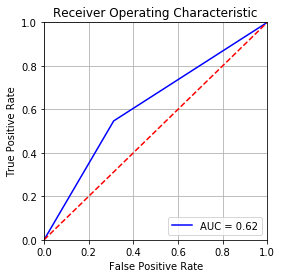

In [0]:
print("******************** Logistic Regression after Feature selection")
LR4 = log_reg(X_train_FS,X_test_FS,y_train,y_test)

******************** KNN after Feature selection
0.6184360981616677
29
Classification Report
              precision    recall  f1-score   support

           0       0.62      0.67      0.65      5896
           1       0.61      0.56      0.59      5473

    accuracy                           0.62     11369
   macro avg       0.62      0.62      0.62     11369
weighted avg       0.62      0.62      0.62     11369

Confusion Matrix
[[3956 1940]
 [2398 3075]]
Accuracy Score = 0.6184360981616677


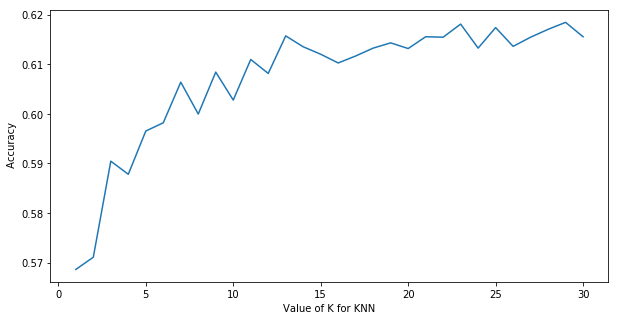

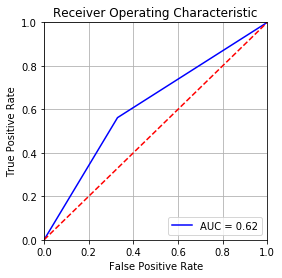

In [0]:
print("******************** KNN after Feature selection")
KNN4 = knn_model(X_train_FS,X_test_FS,y_train,y_test)

******************** Decision Tree after Feature selection
Classification Report
              precision    recall  f1-score   support

           0       0.58      0.59      0.59      3936
           1       0.55      0.55      0.55      3643

   micro avg       0.57      0.57      0.57      7579
   macro avg       0.57      0.57      0.57      7579
weighted avg       0.57      0.57      0.57      7579

Confusion Matrix
[[2321 1615]
 [1649 1994]]
Accuracy Score = 0.5693363240533051


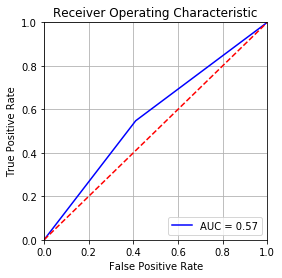

In [0]:
print("******************** Decision Tree after Feature selection")
DT4 = decision_tree_model(X_train_FS,X_test_FS,y_train,y_test)

********************* Random Forest with Normalized Data****************
Classification Report
              precision    recall  f1-score   support

           0       0.67      0.68      0.67      3936
           1       0.64      0.63      0.64      3643

   micro avg       0.65      0.65      0.65      7579
   macro avg       0.65      0.65      0.65      7579
weighted avg       0.65      0.65      0.65      7579

Confusion Matrix
[[2659 1277]
 [1339 2304]]
Accuracy Score = 0.6548357303074284


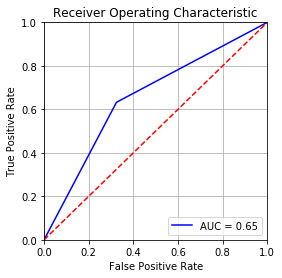

In [0]:
print("********************* Random Forest with Normalized Data****************")
RF4 =  random_forest_model(X_train_FS, X_test_FS, y_train, y_test)

********************* SVM with original Data*****************************


C:\Users\lakshya_hanshvik\Anaconda3\lib\site-packages\sklearn\svm\base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Classification Report
              precision    recall  f1-score   support

           0       0.56      0.04      0.08      3936
           1       0.48      0.96      0.64      3643

   micro avg       0.49      0.49      0.49      7579
   macro avg       0.52      0.50      0.36      7579
weighted avg       0.52      0.49      0.35      7579

Confusion Matrix
[[ 169 3767]
 [ 132 3511]]
Accuracy Score = 0.4855521836653912


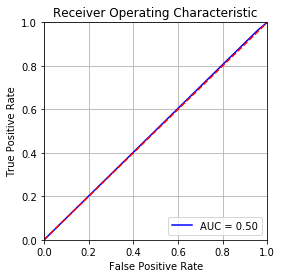

In [0]:
print("********************* SVM with original Data*****************************")
SVM4 =  svm_model(X_train_FS, X_test_FS, y_train, y_test)

# Logistic Regression with Grid Search

In [0]:
reg = LogisticRegression(solver='liblinear')
# Create regularization penalty space
penalty = ['l1', 'l2']

# Create regularization hyperparameter space
C =[0.001,0.003,0.005,0.01,0.03,0.05,0.1,0.3,0.5,1,2,3,3,4,5,10,20]

# Create hyperparameter options
hyperparameters = dict(C=C, penalty=penalty)

# Create grid search using 5-fold cross validation
clf = GridSearchCV(reg, hyperparameters, cv=10, verbose=0)
model = clf.fit(X_train, y_train)

print('Best Penalty:', model.best_estimator_.get_params()['penalty'])
print('Best C:', model.best_estimator_.get_params()['C'])
print("Tuned Logistic Regression Parameters: {}".format(model.best_params_)) 
print("Best score is {}".format(model.best_score_))

Best Penalty: l2
Best C: 0.03
Tuned Logistic Regression Parameters: {'C': 0.03, 'penalty': 'l2'}
Best score is 0.6493270880063333


# KNN with gridsearch

In [0]:
knn = KNeighborsClassifier()
k_range = list(range(1,11))
weight_options = ["uniform", "distance"]
metrics = ['euclidean','manhattan']

param_grid = dict(n_neighbors = k_range, weights = weight_options, metric = metrics)

knn = KNeighborsClassifier()

grid = GridSearchCV(knn, param_grid, cv = 10, scoring = 'accuracy')
grid.fit(X1,y)
#grid.fit(X_train,y_train)

#print(grid.grid_scores_)


GridSearchCV(cv=10, error_score='raise-deprecating',
       estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform'),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10], 'weights': ['uniform', 'distance'], 'metric': ['euclidean', 'manhattan']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)

In [0]:
print (grid.best_score_)
print (grid.best_params_)
print (grid.best_estimator_)

0.5438448344108722
{'metric': 'manhattan', 'n_neighbors': 9, 'weights': 'uniform'}
KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='manhattan',
           metric_params=None, n_jobs=None, n_neighbors=9, p=2,
           weights='uniform')


In [0]:
#Using the best parameters to make predictions
knn = KNeighborsClassifier(n_neighbors=9, weights='uniform' , metric = 'manhattan')
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
print("Accuracy Score = {}".format(accuracy_score(y_test,y_pred)))


Accuracy Score = 0.6196068082860535


In [0]:
# Create Decision Tree classifer object
decision_tree = DecisionTreeClassifier()

# Decision trees with grid search

In [0]:
param_grid = {"criterion": ["gini", "entropy"],
              "min_samples_split": [10,20,30,40,50,60,70,80,90,100,],
              "min_samples_leaf": [10,20,30,40,50,60,70,80,90,100]              
              }

dt = DecisionTreeClassifier()
grid = GridSearchCV(dt, param_grid, cv = 10, scoring = 'accuracy')
grid.fit(X1,y)
#grid.fit(X_train,y_train)

GridSearchCV(cv=10, error_score='raise-deprecating',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'criterion': ['gini', 'entropy'], 'min_samples_split': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100], 'min_samples_leaf': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)

In [0]:
print (grid.best_score_)
print (grid.best_params_)
print (grid.best_estimator_)

0.5802348594801425
{'criterion': 'gini', 'min_samples_leaf': 100, 'min_samples_split': 80}
DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=100, min_samples_split=80,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')


# Random Forest with Grid Search

In [0]:
param_grid = {'n_estimators': [100,200,300,400,500], 'max_features':[30],
              'bootstrap' : [True] }
clf= RandomForestClassifier()

grid = GridSearchCV(clf, param_grid, cv = 10, scoring = 'accuracy')

grid.fit(X1,y)

GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators='warn', n_jobs=None,
                                              oob_score=False,
                                              random_state=None, verbose=0,
                                              warm_start=False),
             ii

In [0]:
print (grid.best_score_)
print (grid.best_params_)
print (grid.best_estimator_)

0.569811320754717
{'bootstrap': True, 'max_features': 30, 'n_estimators': 400}
RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features=30, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=400,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)


# Gradient  Boost classifier

Classification Report
              precision    recall  f1-score   support

           0       0.68      0.68      0.68      5896
           1       0.66      0.65      0.65      5473

    accuracy                           0.67     11369
   macro avg       0.67      0.67      0.67     11369
weighted avg       0.67      0.67      0.67     11369

Confusion Matrix
[[4036 1860]
 [1932 3541]]
Accuracy Score = 0.6664614302049433


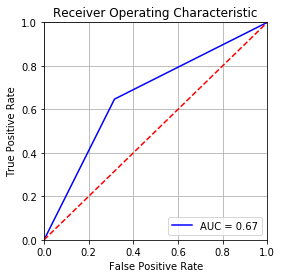

In [0]:

clf = GradientBoostingClassifier(learning_rate=0.1, n_estimators=100,max_depth=10, min_samples_split=2, min_samples_leaf=1, subsample=1,max_features='sqrt', random_state=10)
clf.fit(X_train,y_train)

ypred=clf.predict(X_test)
metric_report(y_test,ypred)
plot_roc_curve(y_test,ypred)  